In [1]:
library(dplyr)
library(ggplot2)
library(data.table)
library(EnhancedVolcano)
setwd("/rds/general/user/emacdona/projects/covid19-transcriptome/live/sc_rnaseq/DEG/")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: ggrepel

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [2]:
input<-fread("GSEA_1-5_input_new.txt",data.table=FALSE,header=FALSE)

In [3]:
input

V1                         V2 V3
1   monocyte                   1  1 
2   T_reg                      1  1 
3   DC                         1  1 
4   T_CD4+                     1  1 
5   NK                         1  1 
6   T_CD8+                     1  1 
7   RBC                        1  1 
8   B                          1  1 
9   MAIT                       1  1 
10  T_g_d                      1  1 
11  B_ASC                      1  1 
12  Platelet                   1  1 
13  HSPC                       1  1 
14  CD14mono                   2  1 
15  T_reg                      2  1 
16  CD16mono                   2  1 
17  pDC                        2  1 
18  T_CD4_Naive                2  1 
19  NK                         2  1 
20  T_CD4_Helper               2  1 
21  T_CD8_CTL                  2  1 
22  Int.mono                   2  1 
23  T_CD4_CTL                  2  1 
24  RBC                        2  1 
25  B_ASC_dividing             2  1 
26  B_switched_mem             2  1 
27  NK_CD56_bright             2  1 
28  T_CD8_Naive                2  1 
29  DC2                        2  1 
30  MAIT                       2  1 
⋮   ⋮                          ⋮  ⋮ 
296 Platelet                   2  5 
297 HSPC                       2  5 
298 B_ASC_IgM                  2  5 
299 B_non-switched_mem         2  5 
300 DC3                        2  5 
301 B_ASC_IgG                  2  5 
302 DC1                        2  5 
303 T_CD4_cycling              2  5 
304 B_CD11c                    2  5 
305 T_CD8_EMRA                 2  5 
306 ILC                        2  5 
307 ASDC                       2  5 
308 B_ASC_other                2  5 
309 CD14mono_activated         4  5 
310 CD16mono                   4  5 
311 pDC                        4  5 
312 CD14mono                   4  5 
313 Int.mono                   4  5 
314 CD16mono_IFN               4  5 
315 CD14mono_IFN               4  5 
316 RBC                        4  5 
317 CD16mono_C1                4  5 
318 DC2                        4  5 
319 Platelet                   4  5 
320 CD14mono_anti_inflammatory 4  5 
321 HSPC                       4  5 
322 DC3                        4  5 
323 DC1                        4  5 
324 DC3_IFN                    4  5 
325 ASDC                       4  5

In [4]:
unique(input$V1)

[1] "monocyte"                   "T_reg"                     
 [3] "DC"                         "T_CD4+"                    
 [5] "NK"                         "T_CD8+"                    
 [7] "RBC"                        "B"                         
 [9] "MAIT"                       "T_g_d"                     
[11] "B_ASC"                      "Platelet"                  
[13] "HSPC"                       "CD14mono"                  
[15] "CD16mono"                   "pDC"                       
[17] "T_CD4_Naive"                "T_CD4_Helper"              
[19] "T_CD8_CTL"                  "Int.mono"                  
[21] "T_CD4_CTL"                  "B_ASC_dividing"            
[23] "B_switched_mem"             "NK_CD56_bright"            
[25] "T_CD8_Naive"                "DC2"                       
[27] "B_naive"                    "NKT"                       
[29] "T_CD8_Mem"                  "B_ASC_IgA"                 
[31] "B_ASC_IgM"                  "B_non-switched_mem"        
[33] "DC3"                        "B_ASC_IgG"                 
[35] "DC1"                        "T_CD4_cycling"             
[37] "B_CD11c"                    "T_CD8_EMRA"                
[39] "ILC"                        "ASDC"                      
[41] "B_ASC_other"                "CD14mono_activated"        
[43] "CD16mono_IFN"               "CD14mono_IFN"              
[45] "CD16mono_C1"                "CD14mono_anti_inflammatory"
[47] "DC3_IFN"

In [5]:
#input[is.na(input$V1),]

In [6]:
new_input<-input

In [7]:
head(new_input)

V1       V2 V3
1 monocyte 1  1 
2 T_reg    1  1 
3 DC       1  1 
4 T_CD4+   1  1 
5 NK       1  1 
6 T_CD8+   1  1

In [8]:
new_input[new_input$V3==1,]

V1                         V2 V3
1  monocyte                   1  1 
2  T_reg                      1  1 
3  DC                         1  1 
4  T_CD4+                     1  1 
5  NK                         1  1 
6  T_CD8+                     1  1 
7  RBC                        1  1 
8  B                          1  1 
9  MAIT                       1  1 
10 T_g_d                      1  1 
11 B_ASC                      1  1 
12 Platelet                   1  1 
13 HSPC                       1  1 
14 CD14mono                   2  1 
15 T_reg                      2  1 
16 CD16mono                   2  1 
17 pDC                        2  1 
18 T_CD4_Naive                2  1 
19 NK                         2  1 
20 T_CD4_Helper               2  1 
21 T_CD8_CTL                  2  1 
22 Int.mono                   2  1 
23 T_CD4_CTL                  2  1 
24 RBC                        2  1 
25 B_ASC_dividing             2  1 
26 B_switched_mem             2  1 
27 NK_CD56_bright             2  1 
28 T_CD8_Naive                2  1 
29 DC2                        2  1 
30 MAIT                       2  1 
⋮  ⋮                          ⋮  ⋮ 
36 Platelet                   2  1 
37 HSPC                       2  1 
38 B_ASC_IgM                  2  1 
39 B_non-switched_mem         2  1 
40 DC3                        2  1 
41 B_ASC_IgG                  2  1 
42 DC1                        2  1 
43 T_CD4_cycling              2  1 
44 B_CD11c                    2  1 
45 T_CD8_EMRA                 2  1 
46 ILC                        2  1 
47 ASDC                       2  1 
48 B_ASC_other                2  1 
49 CD14mono_activated         4  1 
50 CD16mono                   4  1 
51 pDC                        4  1 
52 CD14mono                   4  1 
53 Int.mono                   4  1 
54 CD16mono_IFN               4  1 
55 CD14mono_IFN               4  1 
56 RBC                        4  1 
57 CD16mono_C1                4  1 
58 DC2                        4  1 
59 Platelet                   4  1 
60 CD14mono_anti_inflammatory 4  1 
61 HSPC                       4  1 
62 DC3                        4  1 
63 DC1                        4  1 
64 DC3_IFN                    4  1 
65 ASDC                       4  1

In [39]:
#if(file.exists(paste0("./level_",x[[2]],"/comp_1/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
load(paste0("./level_",2,"/comp_1/","B_ASC_IgM","_all_deg_new_ethnicity_new.RData"))
        

In [40]:
ls()

[1] "cols"      "df1"       "input"     "new_input" "res1"      "results1" 
[7] "sig"

In [42]:
head(results1)
dim(results1)
head(res1$stats)
dim(res1$stats)

nrow(results1)>0

beta pval qval Singular Conv

[1] 0 5

Dispersion AIC       logLik    (Intercept)
NOC2L  0.05842338  71.60791 -26.80395  -7.287698 
ISG15  0.90511480 120.08683 -51.04342 -15.541258 
SDF4   0.08544741  96.50108 -39.25054  -7.715641 
UBE2J2 0.06933245  72.90293 -27.45147  -5.215057 
PUSL1  0.03581682  52.86695 -17.43348 -14.339750 
INTS11 0.06031392  68.29940 -25.14970  -8.931133 
       WHO_temp_severity_groupsevere_critical sexM       
NOC2L   0.01613490                            -0.67122493
ISG15  -2.21654826                             3.87554311
SDF4    0.06582458                            -0.07333063
UBE2J2  0.65511387                            -2.05255221
PUSL1  -0.63470452                             1.09498945
INTS11 -0.24881105                            -0.38989536
       PC1_nonafricanVsAfrican PC2_asianVsEuropean age_scaled  centreNCL   ⋯
NOC2L  -0.23515658             -0.07820120         -0.10796984 -0.71354565 ⋯
ISG15   0.42353709              0.13820282          0.07831041  3.15305531 ⋯
SDF4   -0.07295676             -0.02934907         -0.25689914 -0.11904883 ⋯
UBE2J2 -0.35743444             -0.13072459         -0.48861785 -1.09136524 ⋯
PUSL1   0.33761923              0.12581242          0.28084505  1.05537329 ⋯
INTS11 -0.10883422             -0.04478071         -0.13752713  0.09456291 ⋯
       P_PC1_nonafricanVsAfrican P_PC2_asianVsEuropean P_age_scaled P_centre  
NOC2L  0.2820733                 0.29988675            0.65885657   0.30713144
ISG15  0.3422754                 0.35451812            0.88304169   0.03891547
SDF4   0.6410525                 0.58310785            0.13284493   0.81187662
UBE2J2 0.1215601                 0.09697751            0.05661642   0.10724039
PUSL1  0.4024171                 0.38706957            0.47529884   0.51429758
INTS11 0.6377909                 0.58056720            0.57805331   0.89856544
       q_WHO_temp_severity_group q_sex     q_PC1_nonafricanVsAfrican
NOC2L  0.9964961                 0.9999914 0.9883490                
ISG15  0.9941301                 0.9999914 0.9883490                
SDF4   0.9941301                 0.9999914 0.9898712                
UBE2J2 0.9941301                 0.9999914 0.9883490                
PUSL1  0.9941301                 0.9999914 0.9883490                
INTS11 0.9941301                 0.9999914 0.9894630                
       q_PC2_asianVsEuropean q_age_scaled q_centre 
NOC2L  0.9948033             0.9922588    0.9736095
ISG15  0.9948033             0.9922588    0.9736095
SDF4   0.9948033             0.9922588    0.9912461
UBE2J2 0.9948033             0.9922588    0.9736095
PUSL1  0.9948033             0.9922588    0.9736095
INTS11 0.9948033             0.9922588    0.9912461

[1] 5298   28

[1] FALSE

In [ ]:
#results1$gene<-rownames(results1)
       # results1$level<-x[[2]]
       # results1$comp<-1
       # results1$cell_type<-x[[1]]
       # return(results1)

In [48]:
df1<-apply(new_input[new_input$V3==1,],1,function(x){
    #print(paste0(x[[1]]," Level ",x[[2]]))
    if(file.exists(paste0("./level_",x[[2]],"/comp_1/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_1/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results1)>0){
            results1$gene<-rownames(results1)
            results1$level<-x[[2]]
            results1$comp<-1
            results1$cell_type<-x[[1]]
            return(results1)
        }#else{
            #print(paste0(x[[1]]," Level ",x[[2]]))
        #}
    }
    
})


In [49]:
df1<-do.call(rbind,df1)
head(df1)
dim(df1)

beta     pval         qval         Singular Conv gene  level comp
1.TPST1 1.553021 1.478969e-04 0.0067545885 0        0    TPST1 1     1   
1.THBS1 1.448876 1.380503e-05 0.0009518345 0        0    THBS1 1     1   
1.AREG  1.316125 2.418856e-03 0.0499040834 0        0    AREG  1     1   
1.MT1H  1.264341 1.918249e-02 0.1807788652 0        0    MT1H  1     1   
1.CLU   1.192703 1.915751e-04 0.0083226159 0        0    CLU   1     1   
1.HP    1.124375 1.814390e-04 0.0079795826 0        0    HP    1     1   
        cell_type
1.TPST1 monocyte 
1.THBS1 monocyte 
1.AREG  monocyte 
1.MT1H  monocyte 
1.CLU   monocyte 
1.HP    monocyte

[1] 29642     9

In [50]:
unique(df1$cell_type)

[1] "monocyte"                   "T_reg"                     
 [3] "DC"                         "T_CD4+"                    
 [5] "NK"                         "T_CD8+"                    
 [7] "RBC"                        "B"                         
 [9] "MAIT"                       "T_g_d"                     
[11] "B_ASC"                      "Platelet"                  
[13] "HSPC"                       "CD14mono"                  
[15] "CD16mono"                   "pDC"                       
[17] "T_CD4_Naive"                "T_CD4_Helper"              
[19] "T_CD8_CTL"                  "Int.mono"                  
[21] "T_CD4_CTL"                  "B_ASC_dividing"            
[23] "B_switched_mem"             "NK_CD56_bright"            
[25] "T_CD8_Naive"                "DC2"                       
[27] "B_naive"                    "NKT"                       
[29] "T_CD8_Mem"                  "B_ASC_IgA"                 
[31] "B_non-switched_mem"         "DC3"                       
[33] "B_ASC_IgG"                  "B_CD11c"                   
[35] "CD14mono_activated"         "CD16mono_IFN"              
[37] "CD14mono_IFN"               "CD16mono_C1"               
[39] "CD14mono_anti_inflammatory" "DC3_IFN"

In [55]:
#lapply(df1,class)

In [52]:
df1[df1$cell_type=="B_ASC_IgM",]

beta pval qval Singular Conv gene level comp cell_type

In [53]:
df1<- df1 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [56]:
#need to write out to file
sig<-df1[df1$qval<0.05,]

In [57]:
sig<-sig[order(sig$qval),]

In [58]:
head(sig)
dim(sig)

beta       pval          qval          Singular Conv gene     level
8.APOBEC3B  1.3459063 2.251232e-173 8.942394e-171 0        0    APOBEC3B 1    
55.LGALS2  -0.7522413 1.831751e-143 9.904538e-141 0        0    LGALS2   4    
1.TNF      -0.9546168 2.582948e-118 6.419527e-116 0        0    TNF      1    
29.IFITM1   0.7699390  7.893039e-82  5.193056e-79 0        0    IFITM1   2    
58.IFITM1   0.7699390  7.893039e-82  5.193056e-79 0        0    IFITM1   4    
7.MTRNR2L8  1.5238263  1.970954e-72  1.135762e-69 0        0    MTRNR2L8 1    
           comp cell_type    colour              
8.APOBEC3B 1    B            Upregulated P<0.05  
55.LGALS2  1    CD14mono_IFN Downregulated P<0.05
1.TNF      1    monocyte     Downregulated P<0.05
29.IFITM1  1    DC2          Upregulated P<0.05  
58.IFITM1  1    DC2          Upregulated P<0.05  
7.MTRNR2L8 1    RBC          Upregulated P<0.05

[1] 255  10

In [59]:
write.table(sig,"sig_DEG_comp_1_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [60]:
write.table(df1,"sig_DEG_comp_1_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [61]:
getwd()

[1] "/rds/general/project/covid19-transcriptome/live/sc_rnaseq/DEG"

Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 77 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 19 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


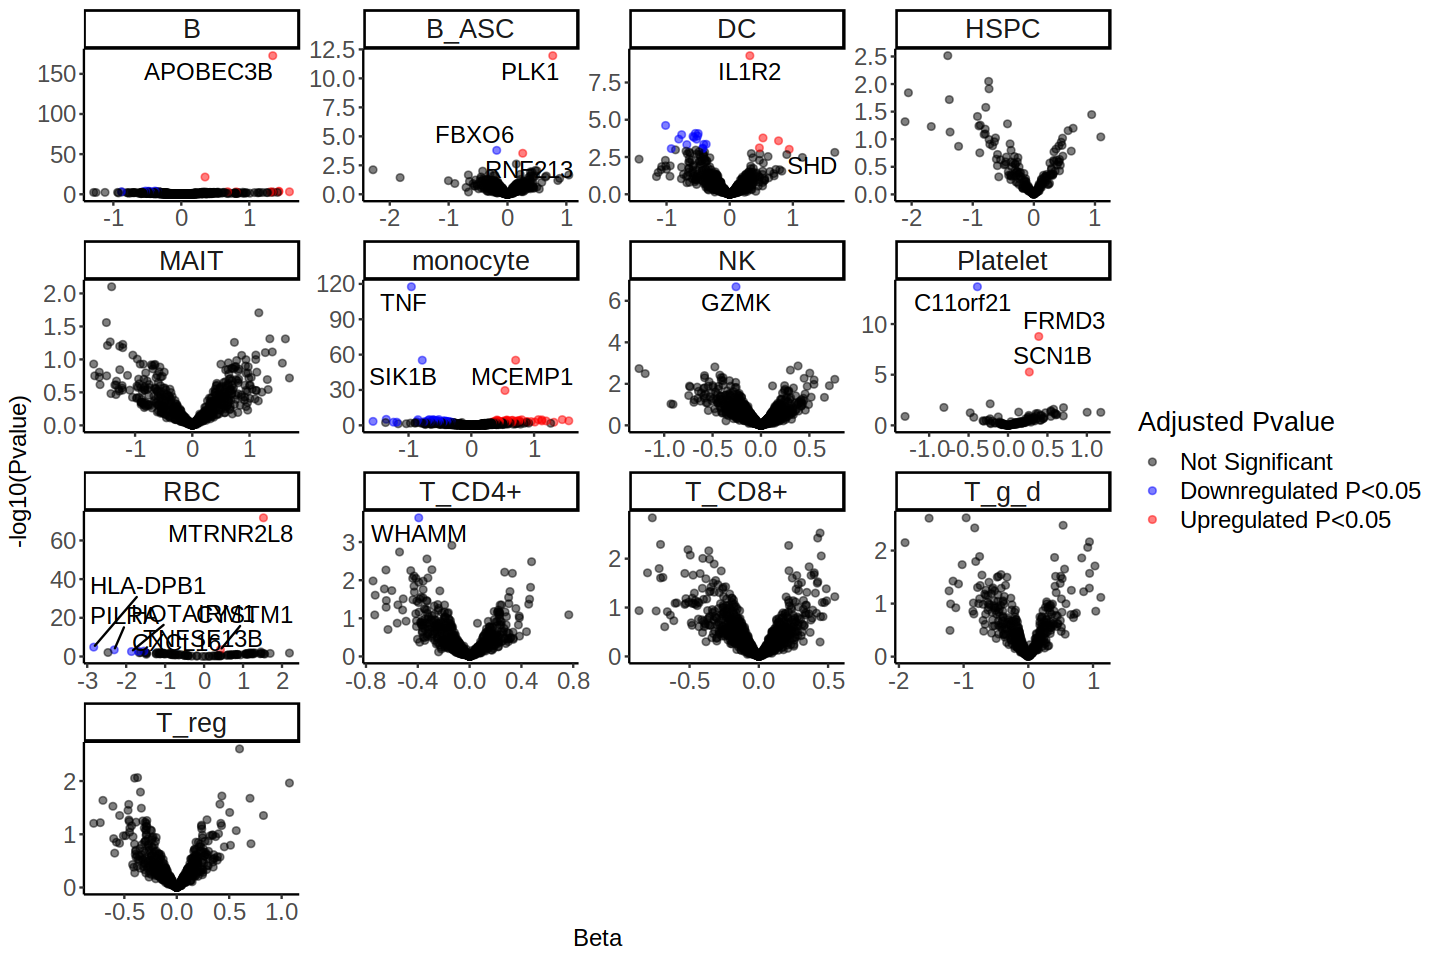

In [62]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df1[df1$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df1[df1$level==1,],qval<0.05),aes(label=df1[df1$level==1 & df1$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

Warning message:
“ggrepel: 40 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


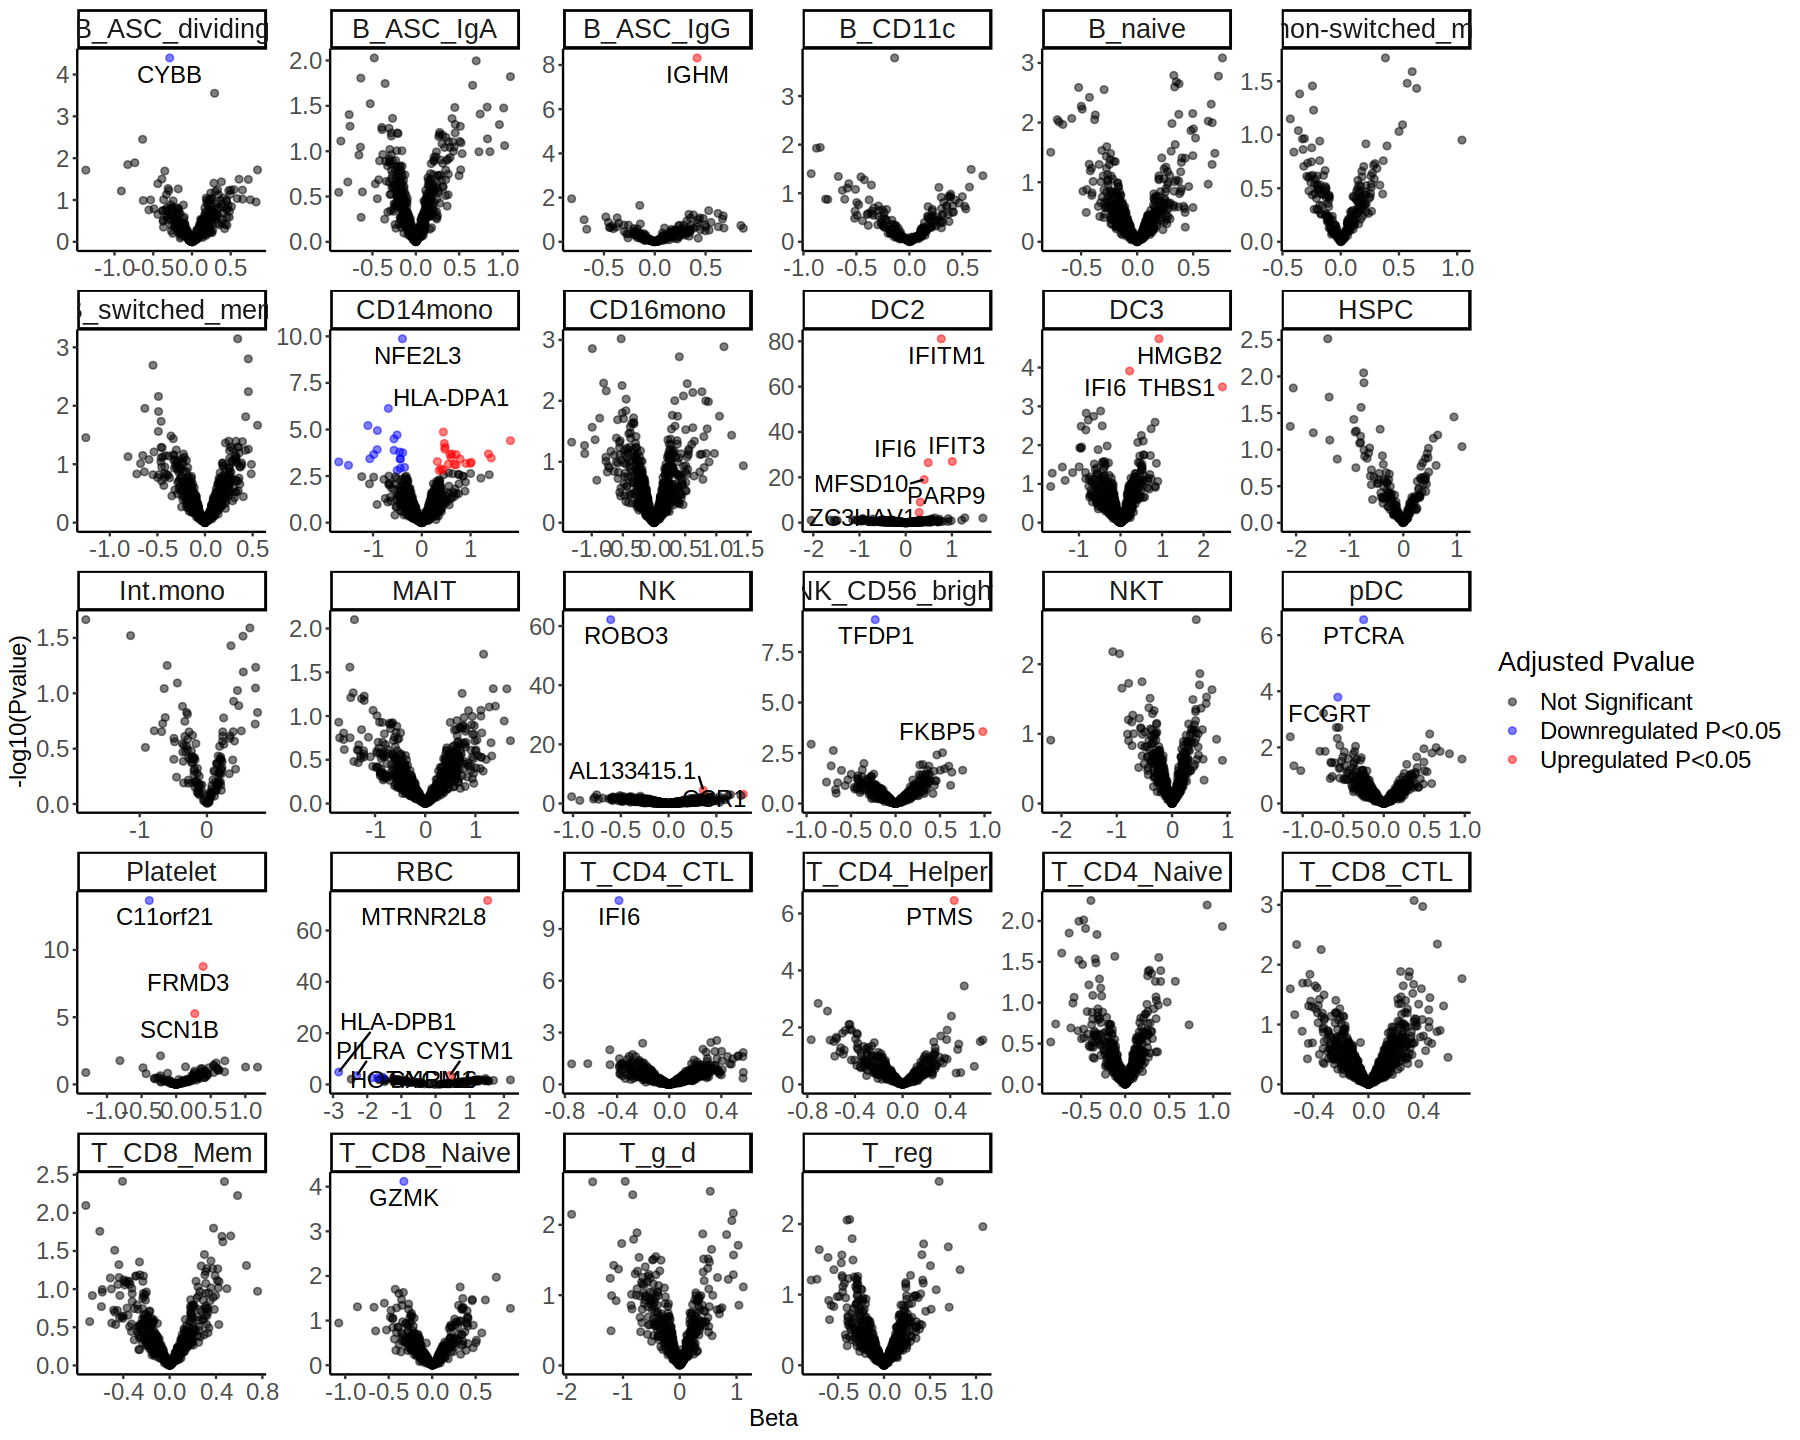

In [63]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df1[df1$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df1[df1$level==2,],qval<0.05),aes(label=df1[df1$level==2 & df1$qval<0.05,"gene"]),size=5,colour="black")
  

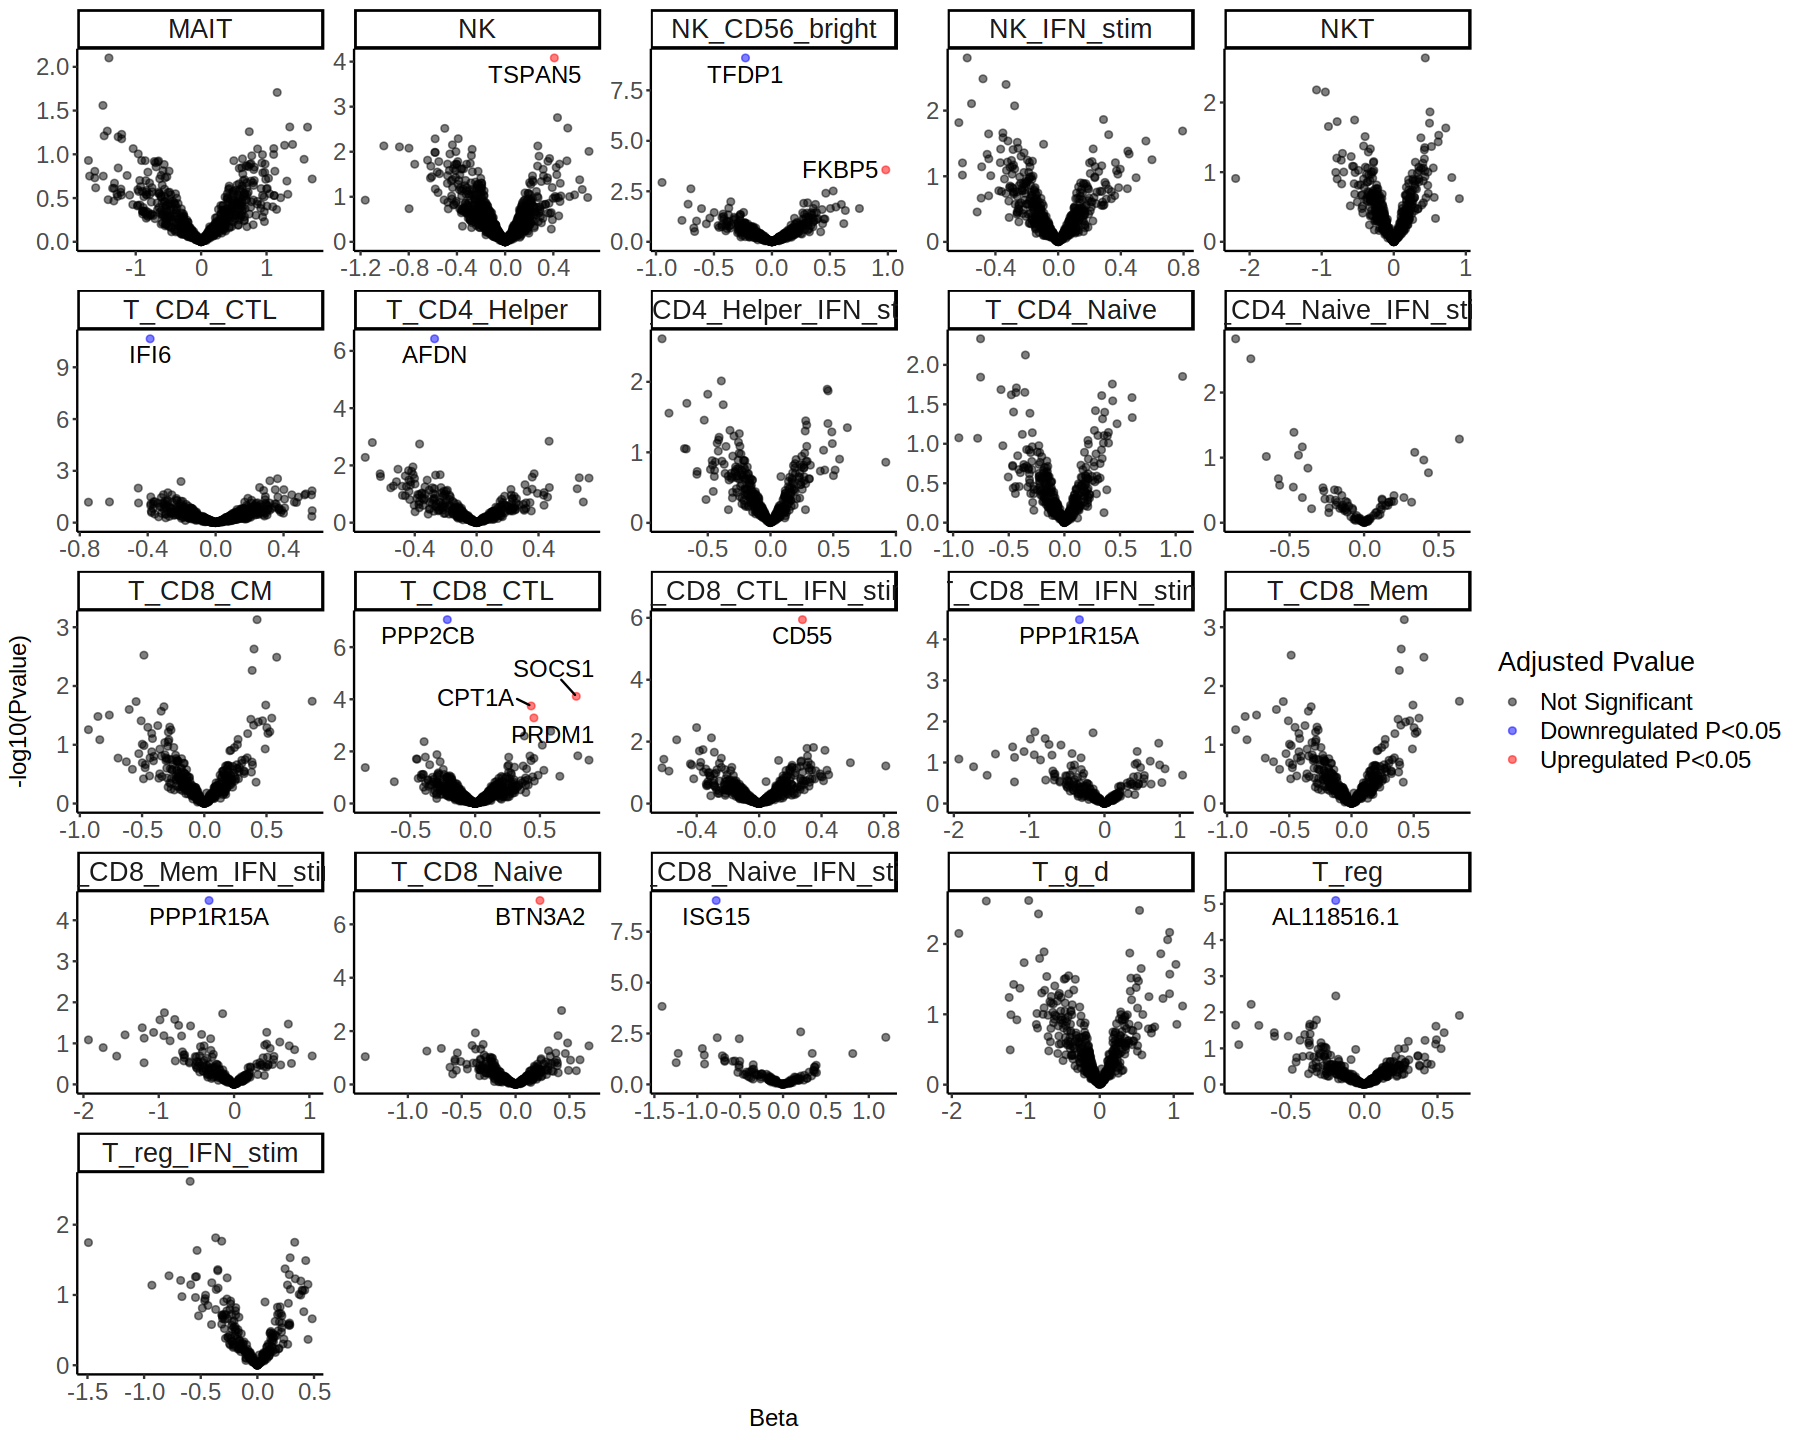

In [22]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df1[df1$level==3,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df1[df1$level==3,],qval<0.05),aes(label=df1[df1$level==3 & df1$qval<0.05,"gene"]),size=5,colour="black")
  

In [9]:
df2<-apply(new_input[new_input$V3==2,],1,function(x){
    #print(x[[1]])
    #print(x[[2]])
    #print(x[[3]])
    if(file.exists(paste0("./level_",x[[2]],"/comp_2/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_2/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results2)>0){
            results2$gene<-rownames(results2)
            results2$level<-x[[2]]
            results2$comp<-2
            results2$cell_type<-x[[1]]
            return(results2)
        }  
    }
})


In [10]:
df2<-do.call(rbind,df2)
head(df2)
dim(df2)

beta     pval        qval      Singular Conv gene   level comp
66.VSIG4  2.507301 0.006485995 0.2916303 0        0    VSIG4  1     2   
66.NT5DC2 2.200641 0.006242187 0.2861489 0        0    NT5DC2 1     2   
66.RPH3A  2.001956 0.081529819 0.9999673 0        0    RPH3A  1     2   
66.SEMA6B 1.948501 0.067931993 0.9999673 0        0    SEMA6B 1     2   
66.CAVIN3 1.936006 0.023047075 0.7115643 0        0    CAVIN3 1     2   
66.SNHG19 1.876636 0.033489031 0.8534140 0        0    SNHG19 1     2   
          cell_type
66.VSIG4  monocyte 
66.NT5DC2 monocyte 
66.RPH3A  monocyte 
66.SEMA6B monocyte 
66.CAVIN3 monocyte 
66.SNHG19 monocyte

[1] 14148     9

In [11]:
lapply(df2,class)

$beta
[1] "numeric"

$pval
[1] "numeric"

$qval
[1] "numeric"

$Singular
[1] "numeric"

$Conv
[1] "numeric"

$gene
[1] "character"

$level
[1] "character"

$comp
[1] "numeric"

$cell_type
[1] "character"

In [12]:
head(df2)

beta     pval        qval      Singular Conv gene   level comp
66.VSIG4  2.507301 0.006485995 0.2916303 0        0    VSIG4  1     2   
66.NT5DC2 2.200641 0.006242187 0.2861489 0        0    NT5DC2 1     2   
66.RPH3A  2.001956 0.081529819 0.9999673 0        0    RPH3A  1     2   
66.SEMA6B 1.948501 0.067931993 0.9999673 0        0    SEMA6B 1     2   
66.CAVIN3 1.936006 0.023047075 0.7115643 0        0    CAVIN3 1     2   
66.SNHG19 1.876636 0.033489031 0.8534140 0        0    SNHG19 1     2   
          cell_type
66.VSIG4  monocyte 
66.NT5DC2 monocyte 
66.RPH3A  monocyte 
66.SEMA6B monocyte 
66.CAVIN3 monocyte 
66.SNHG19 monocyte

In [13]:
df2<- df2 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [14]:
#need to write out to file
sig<-df2[df2$qval<0.05,]

In [15]:
#sig

In [16]:
sig<-sig[order(sig$qval),]


In [17]:
write.table(sig,"sig_DEG_comp_2_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [18]:
write.table(df2,"sig_DEG_comp_2_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

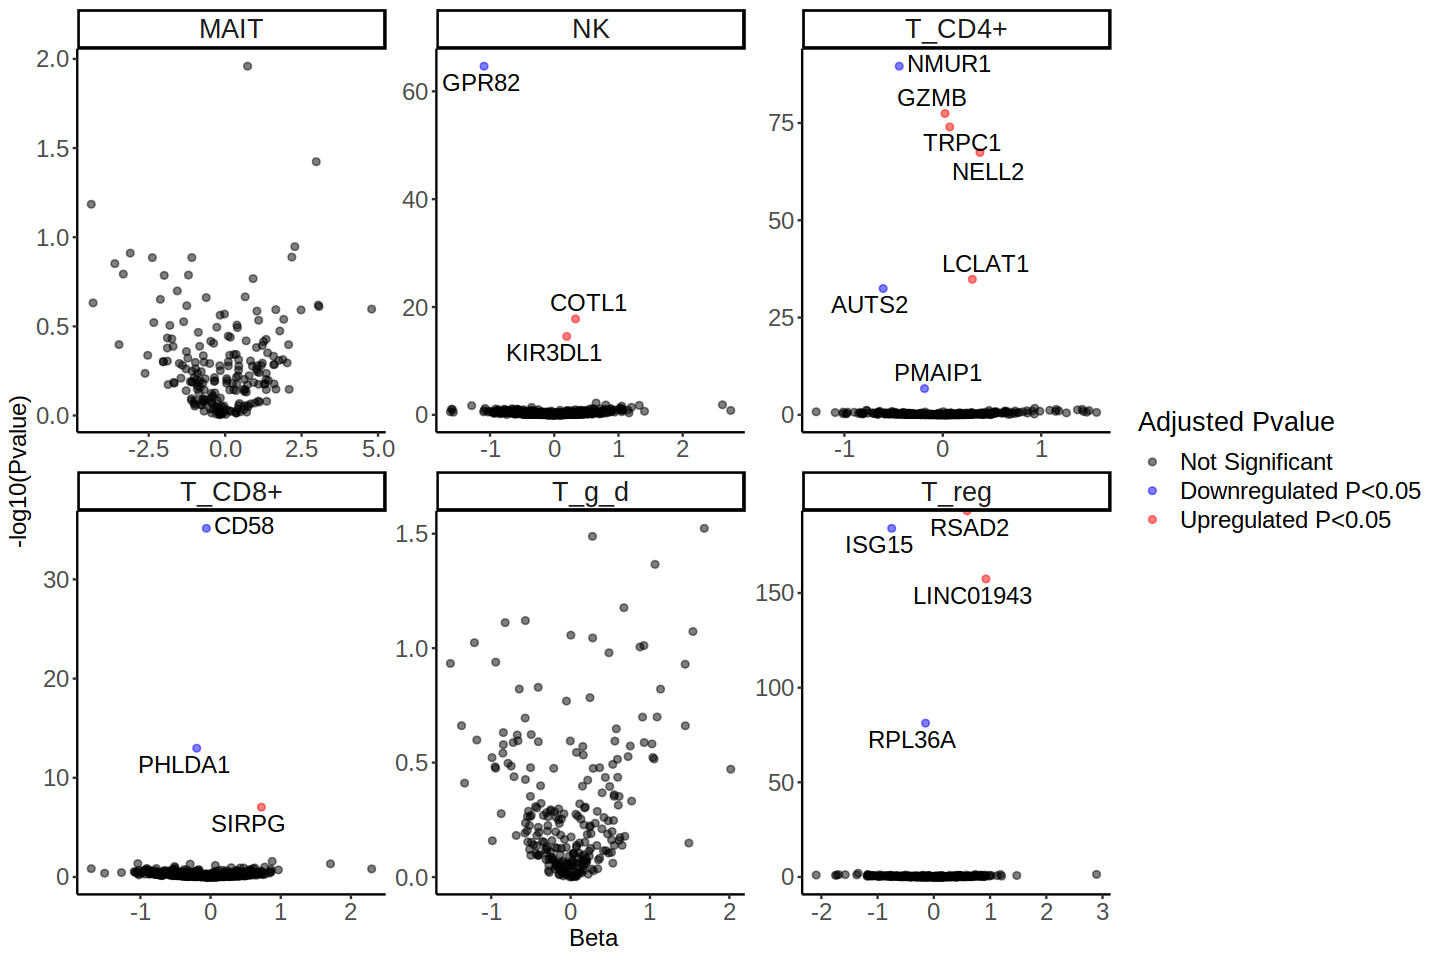

In [30]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df2[df2$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df2[df2$level==1,],qval<0.05),aes(label=df2[df2$level==1 & df2$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

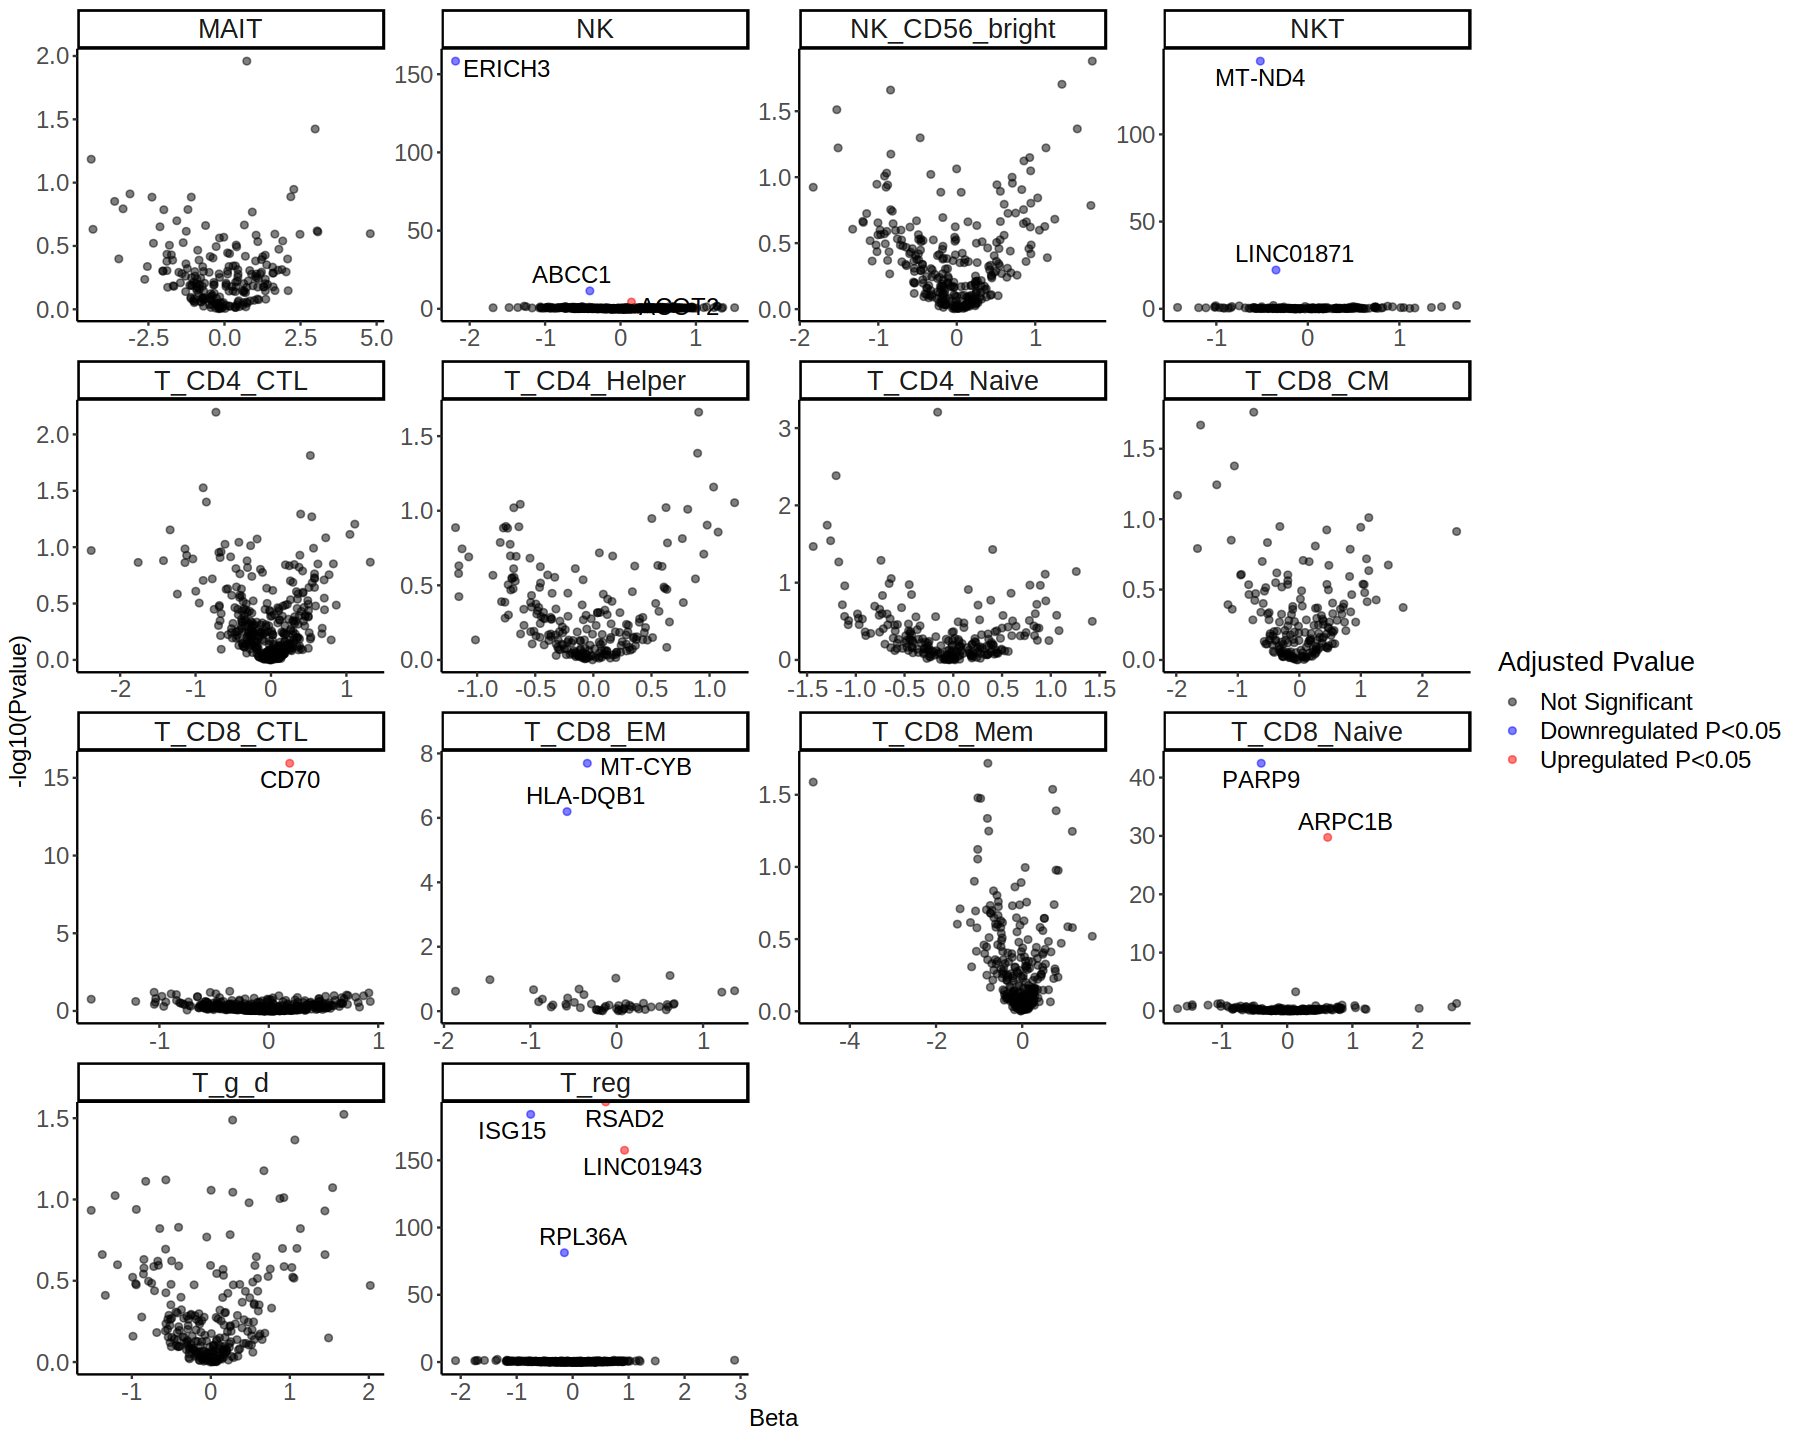

In [31]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df2[df2$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df2[df2$level==2,],qval<0.05),aes(label=df2[df2$level==2 & df2$qval<0.05,"gene"]),size=5,colour="black")
  

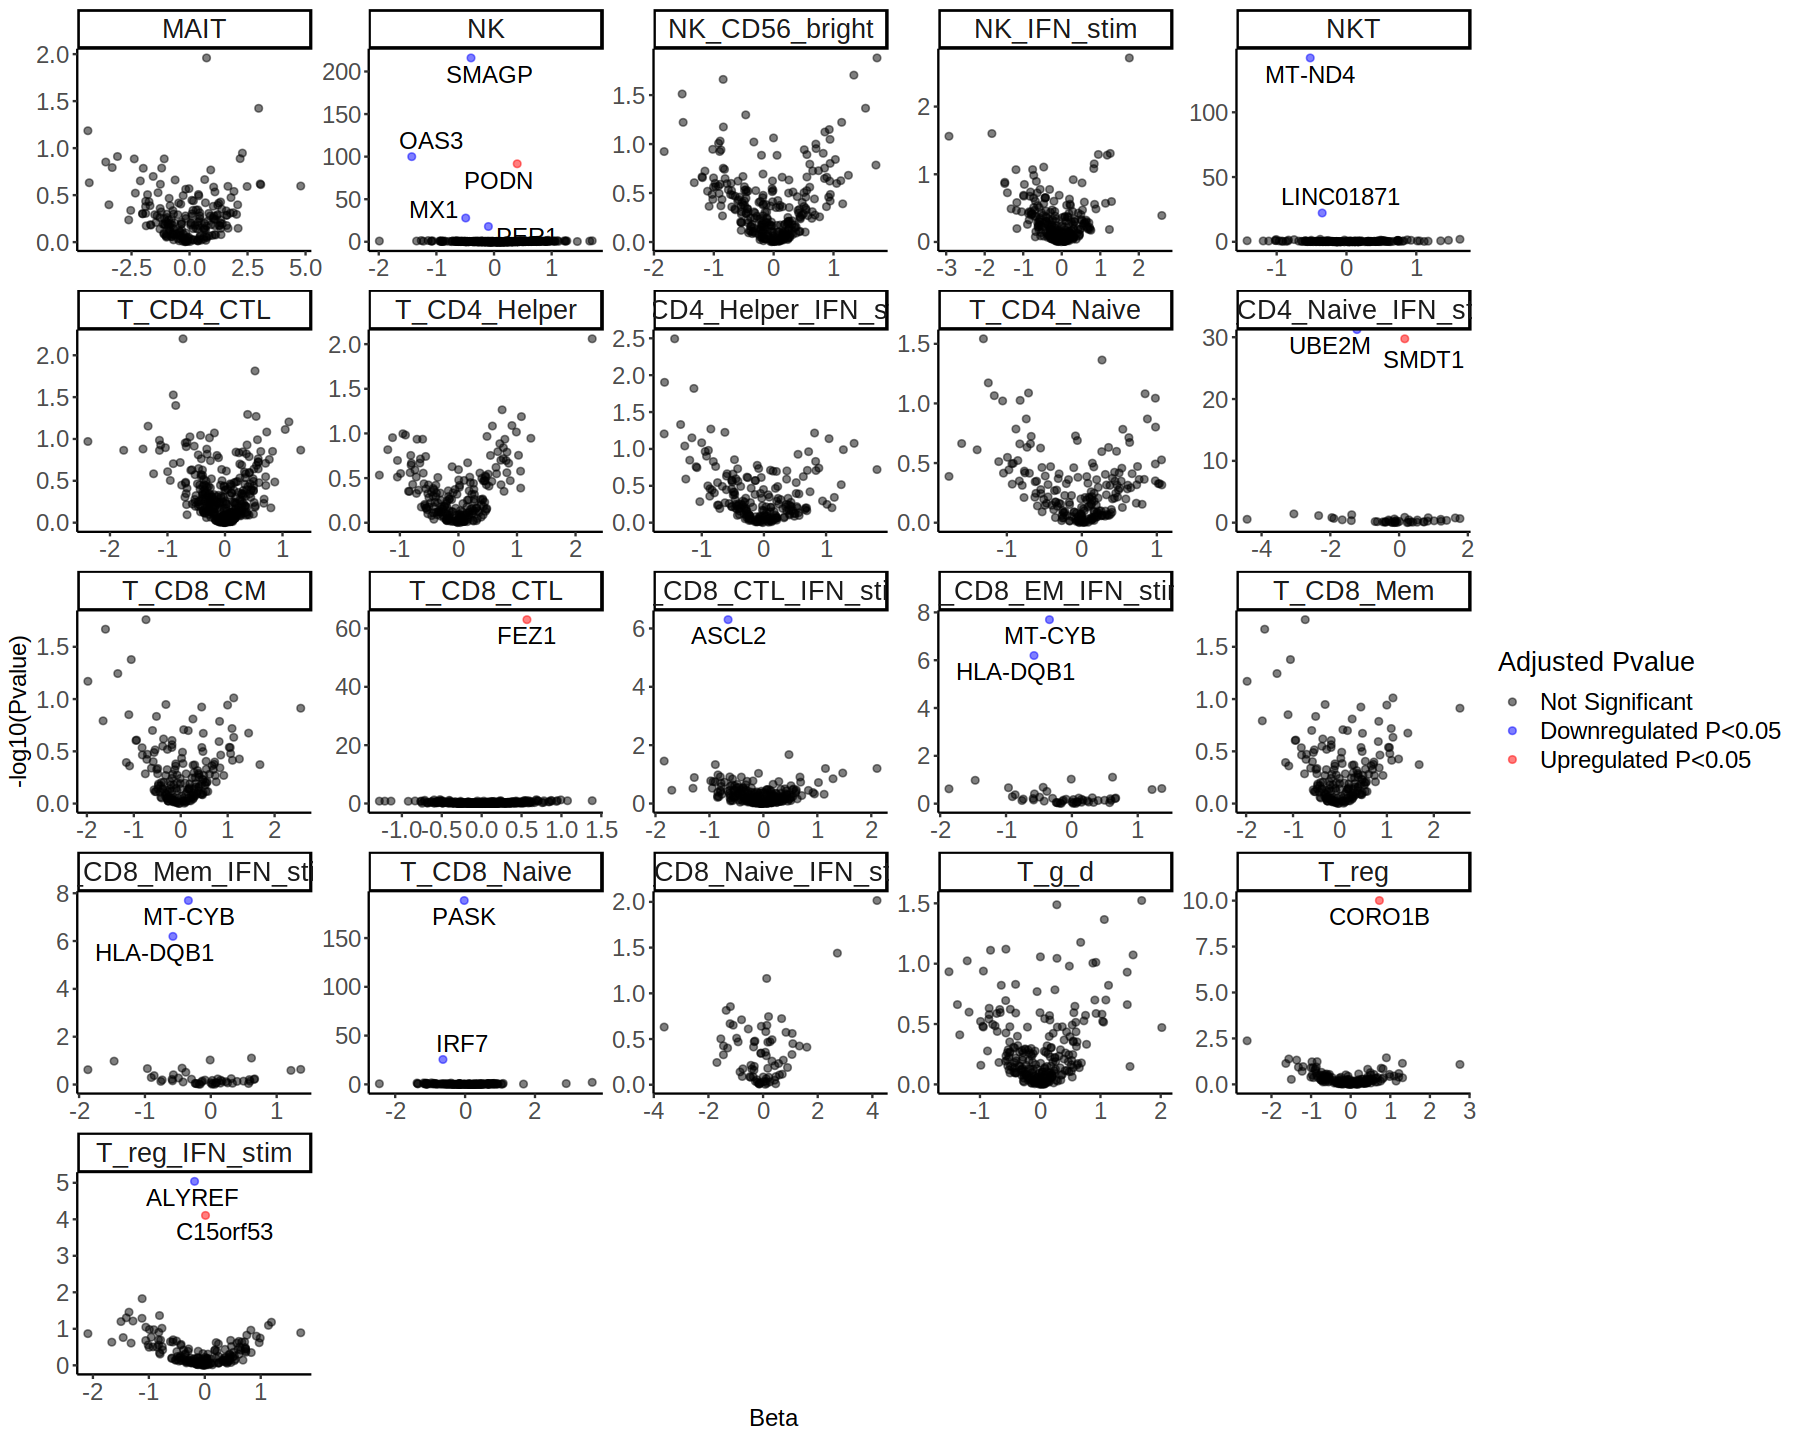

In [32]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df2[df2$level==3,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df2[df2$level==3,],qval<0.05),aes(label=df2[df2$level==3 & df2$qval<0.05,"gene"]),size=5,colour="black")
  

In [97]:
df3<-apply(new_input[new_input$V3==3,],1,function(x){
    #print(x[[1]])
    #print(x[[2]])
    #print(x[[3]])
    if(file.exists(paste0("./level_",x[[2]],"/comp_3/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_3/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results3)>0){
            results3$gene<-rownames(results3)
            results3$level<-x[[2]]
            results3$comp<-3
            results3$cell_type<-x[[1]]
            return(results3)
        } 
    }
})


In [98]:
df3<-do.call(rbind,df3)
head(df3)
dim(df3)

beta     pval         qval         Singular Conv gene    level comp
131.C1QC    1.646585 6.545289e-04 1.315513e-02 0        0    C1QC    1     3   
131.CLU     1.607035 1.119340e-05 7.900181e-04 0        0    CLU     1     3   
131.IFIT1   1.451136 3.002290e-04 7.894255e-03 0        0    IFIT1   1     3   
131.C1QB    1.320766 8.087052e-04 1.490685e-02 0        0    C1QB    1     3   
131.NEXN    1.314292 5.202606e-06 4.073983e-04 0        0    NEXN    1     3   
131.SIGLEC1 1.286592 3.452539e-74 9.259710e-72 0        0    SIGLEC1 1     3   
            cell_type
131.C1QC    monocyte 
131.CLU     monocyte 
131.IFIT1   monocyte 
131.C1QB    monocyte 
131.NEXN    monocyte 
131.SIGLEC1 monocyte

[1] 30550     9

In [99]:
head(df3)

beta     pval         qval         Singular Conv gene    level comp
131.C1QC    1.646585 6.545289e-04 1.315513e-02 0        0    C1QC    1     3   
131.CLU     1.607035 1.119340e-05 7.900181e-04 0        0    CLU     1     3   
131.IFIT1   1.451136 3.002290e-04 7.894255e-03 0        0    IFIT1   1     3   
131.C1QB    1.320766 8.087052e-04 1.490685e-02 0        0    C1QB    1     3   
131.NEXN    1.314292 5.202606e-06 4.073983e-04 0        0    NEXN    1     3   
131.SIGLEC1 1.286592 3.452539e-74 9.259710e-72 0        0    SIGLEC1 1     3   
            cell_type
131.C1QC    monocyte 
131.CLU     monocyte 
131.IFIT1   monocyte 
131.C1QB    monocyte 
131.NEXN    monocyte 
131.SIGLEC1 monocyte

In [100]:
df3<- df3 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [101]:
#need to write out to file
sig<-df3[df3$qval<0.05,]

In [102]:
sig<-sig[order(sig$qval),]


In [103]:
write.table(sig,"sig_DEG_comp_3_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [104]:
write.table(df3,"sig_DEG_comp_3_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

Warning message:
“ggrepel: 156 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 212 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


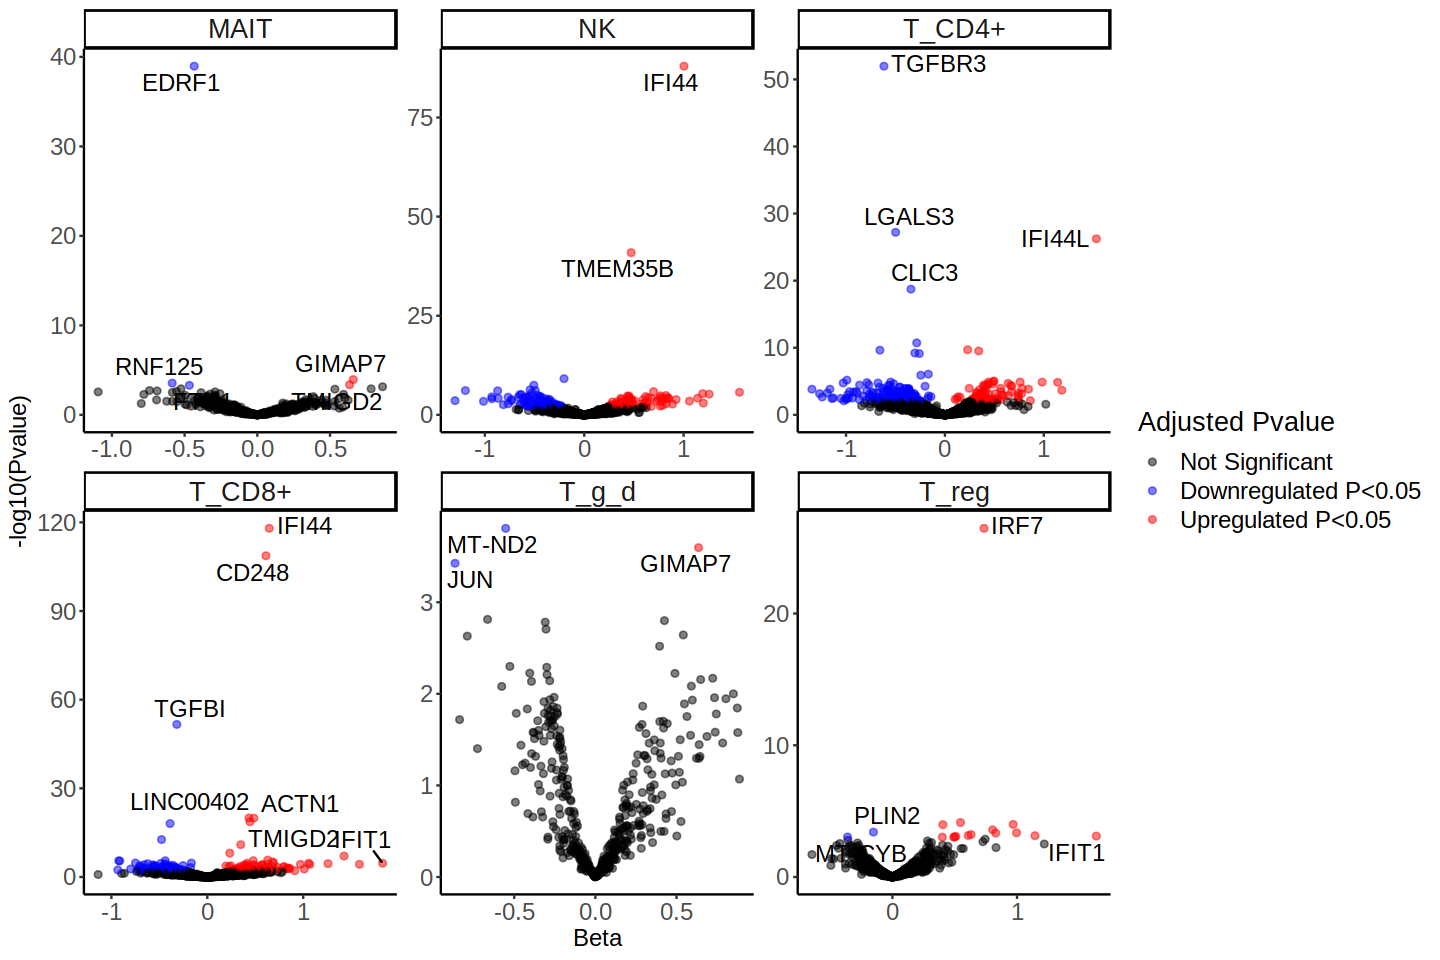

In [23]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df3[df3$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df3[df3$level==1,],qval<0.05),aes(label=df3[df3$level==1 & df3$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 146 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 103 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 164 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 76 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 45 unla

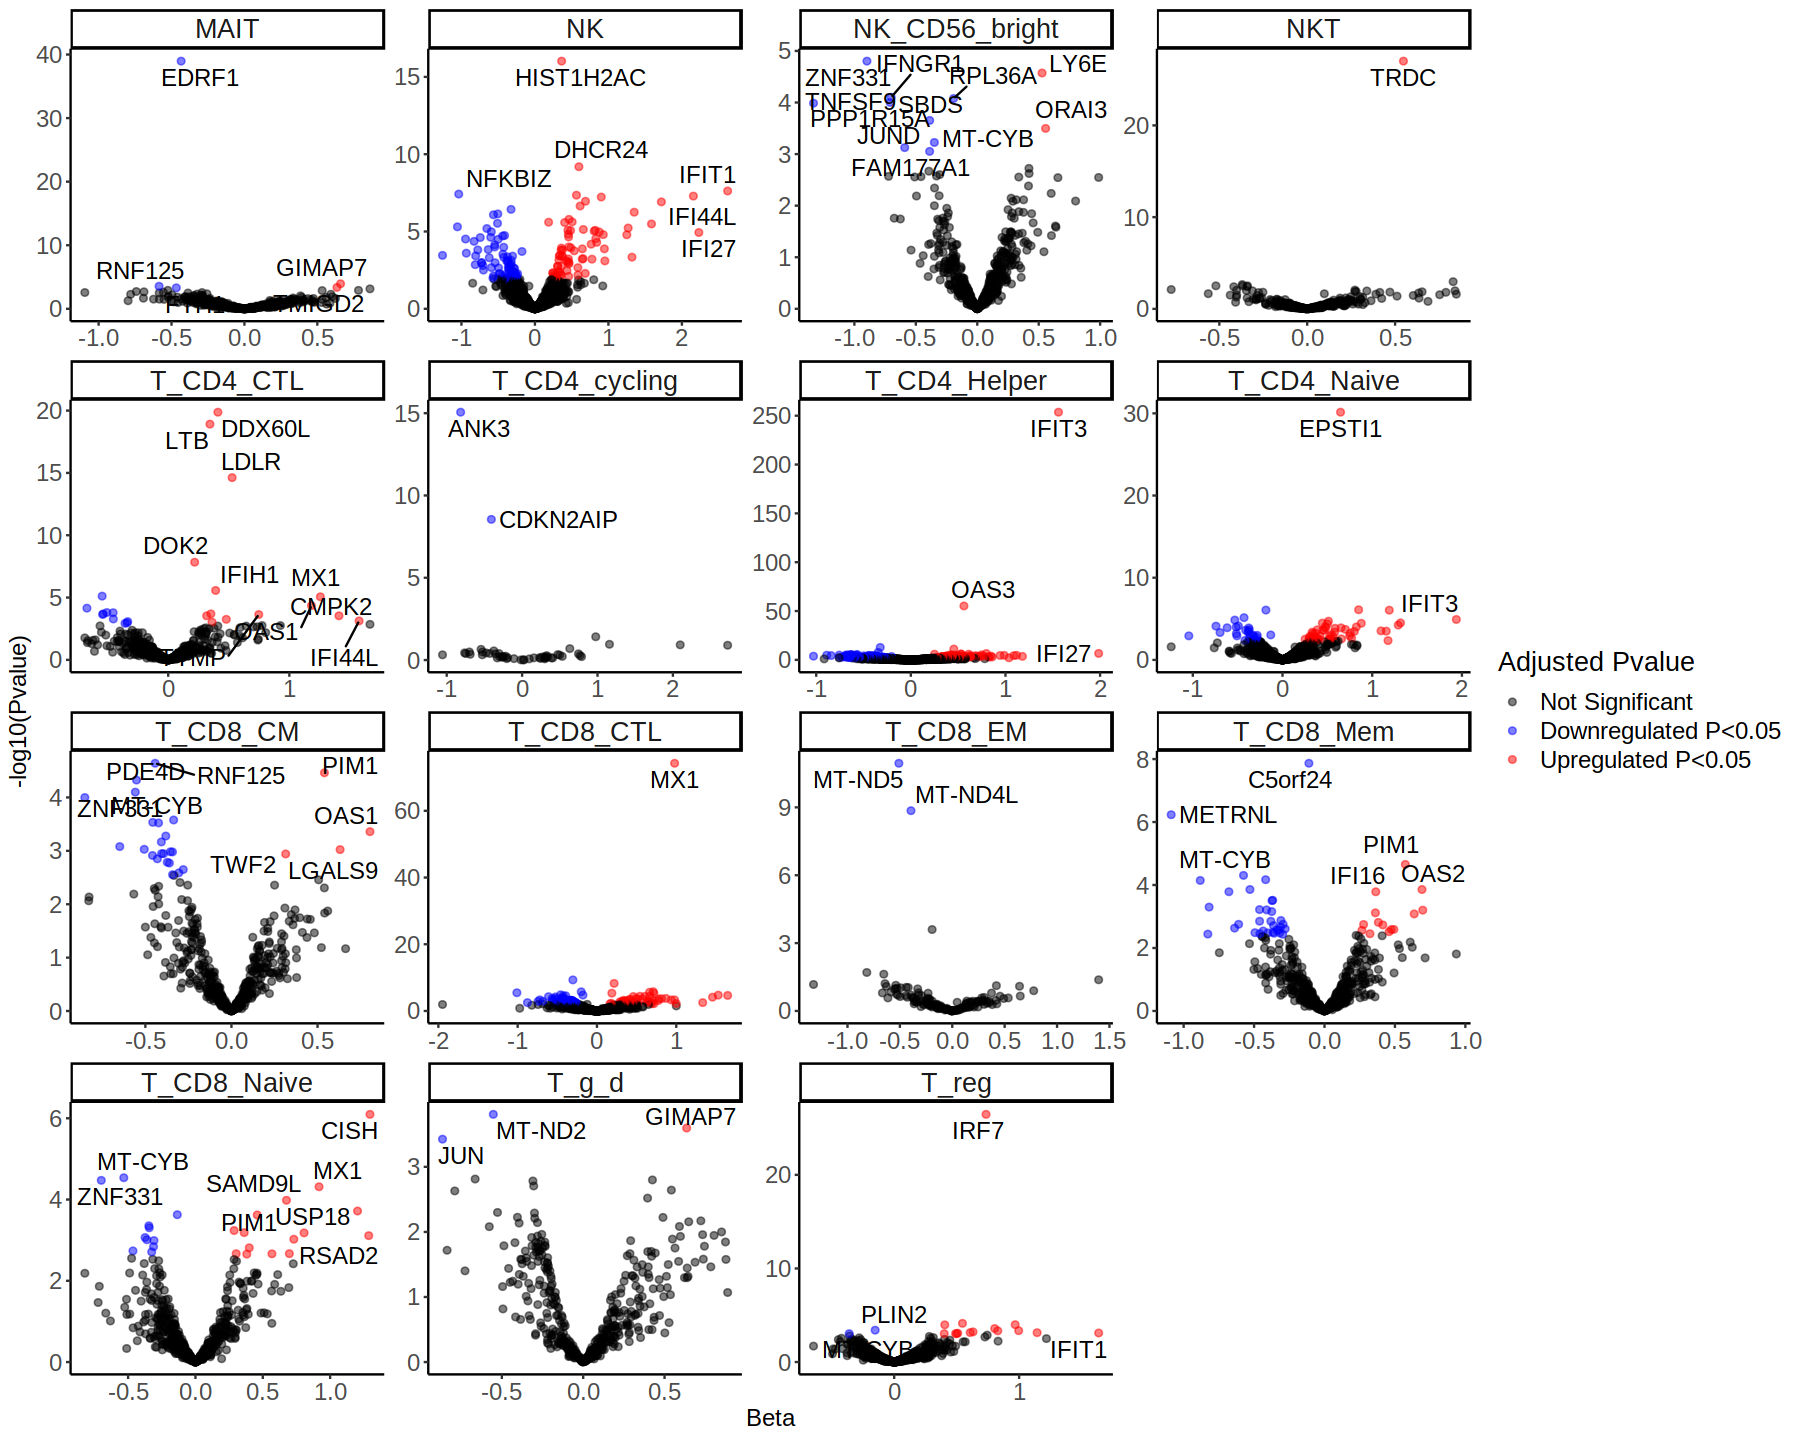

In [40]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df3[df3$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df3[df3$level==2,],qval<0.05),aes(label=df3[df3$level==2 & df3$qval<0.05,"gene"]),size=5,colour="black")
  

Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 120 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 177 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 84 unlabe

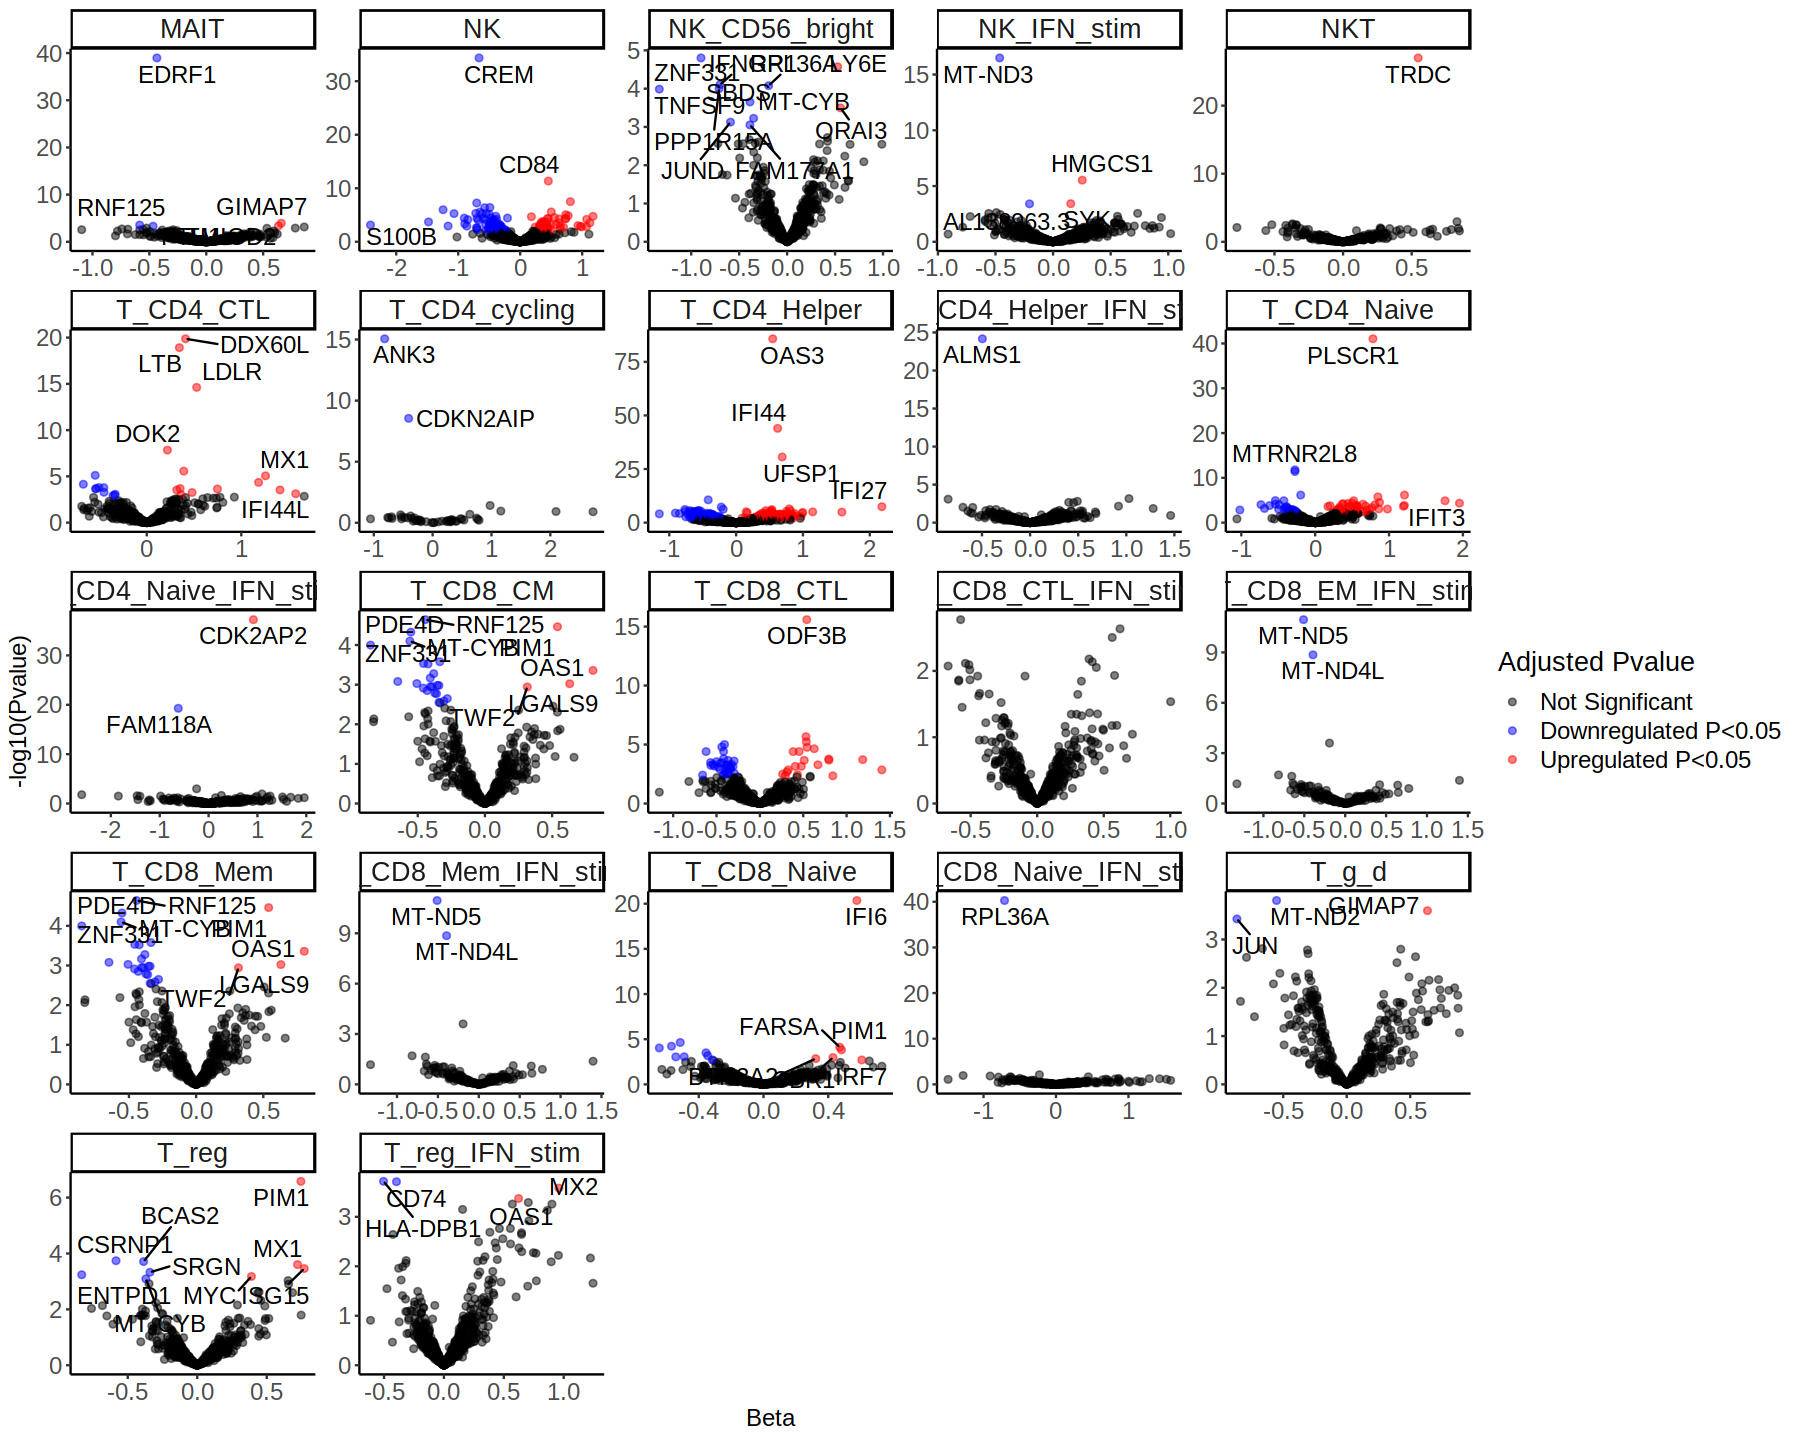

In [41]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df3[df3$level==3,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df3[df3$level==3,],qval<0.05),aes(label=df3[df3$level==3 & df3$qval<0.05,"gene"]),size=5,colour="black")
  

In [45]:
#new_input[new_input$V3==4,]

In [46]:
#load(paste0("./level_1/comp_4/T_reg_all_deg_new_ethnicity_new.RData"))
        
            #results4$gene<-rownames(results4)
            #results4$level<-1
            #results4$comp<-4
            #results4$cell_type<-"T_CD4+"

In [47]:
#head(results4)

In [105]:
df4<-apply(new_input[new_input$V3==4,],1,function(x){
    #print(x[[1]])
    #print(x[[2]])
    #print(x[[3]])
    if(file.exists(paste0("./level_",x[[2]],"/comp_4/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_4/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results4)>0){
            #print(head(results4))
            results4$gene<-rownames(results4)
            results4$level<-x[[2]]
            results4$comp<-4
            results4$cell_type<-x[[1]]
            return(results4)
        }   
    }
})


In [107]:
#head(df4)

In [50]:
#length(df4)
#lapply(df4,is.null)
#head(df4[[2]])

In [108]:
dftmp<-df4[-which(lapply(df4,is.null) == T)]

In [109]:
df4<-dftmp

In [110]:
df4<-do.call(rbind,df4)
head(df4)
dim(df4)

beta      pval      qval      Singular Conv gene      level comp
196.UPK3A     0.3229635 0.3236145 0.9973005 0        0    UPK3A     1     4   
196.SELL      0.2917356 0.1687569 0.9973005 0        0    SELL      1     4   
196.ANKRD9    0.2748682 0.3210058 0.9973005 0        0    ANKRD9    1     4   
196.LINC00957 0.2665185 0.4479057 0.9973005 0        0    LINC00957 1     4   
196.ZBED3     0.2548543 0.4126435 0.9973005 0        0    ZBED3     1     4   
196.ZDHHC18   0.2514568 0.2249461 0.9973005 0        0    ZDHHC18   1     4   
              cell_type
196.UPK3A     monocyte 
196.SELL      monocyte 
196.ANKRD9    monocyte 
196.LINC00957 monocyte 
196.ZBED3     monocyte 
196.ZDHHC18   monocyte

[1] 2383    9

In [111]:
df4<- df4 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [112]:
#need to write out to file
sig<-df4[df4$qval<0.05,]

In [113]:
sig<-sig[order(sig$qval),]


In [114]:
head(sig)

beta       pval         qval         Singular Conv gene     level
235.EMC7     -0.2660056 5.373115e-11 1.386264e-07 0        0    EMC7     2    
199.MTRNR2L8  0.7302528 5.208282e-10 9.832196e-07 0        0    MTRNR2L8 1    
             comp cell_type colour              
235.EMC7     4    DC3       Downregulated P<0.05
199.MTRNR2L8 4    T_CD4+    Upregulated P<0.05

In [115]:
write.table(sig,"sig_DEG_comp_4_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [116]:
write.table(df4,"sig_DEG_comp_4_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [58]:
getwd()

[1] "/rds/general/project/covid19-transcriptome/live/sc_rnaseq/DEG"

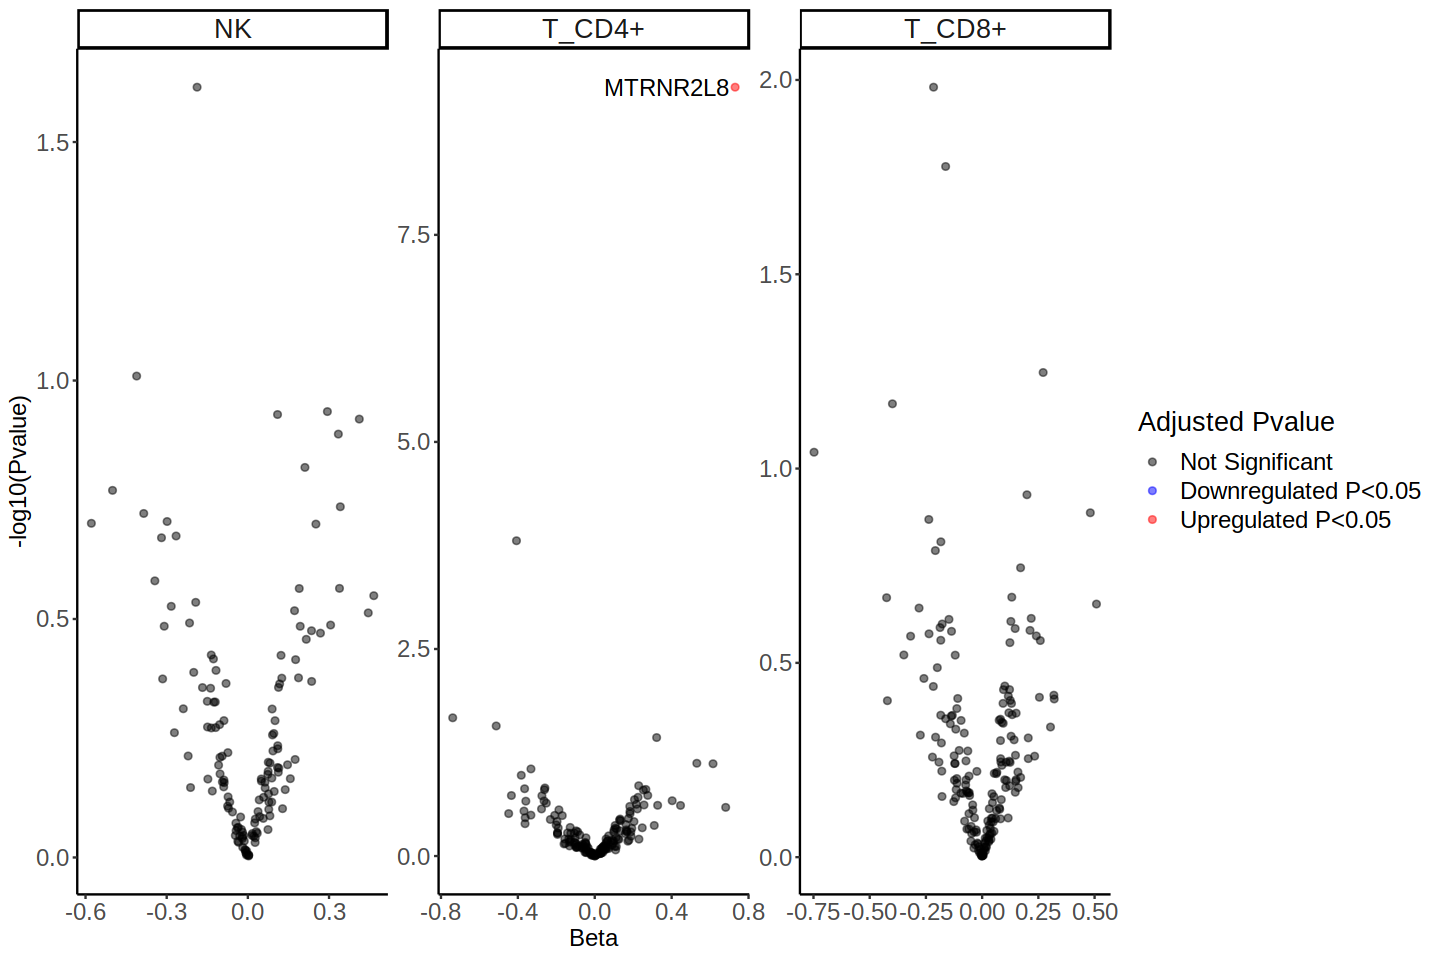

In [60]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df4[df4$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df4[df4$level==1,],qval<0.05),aes(label=df4[df4$level==1 & df4$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

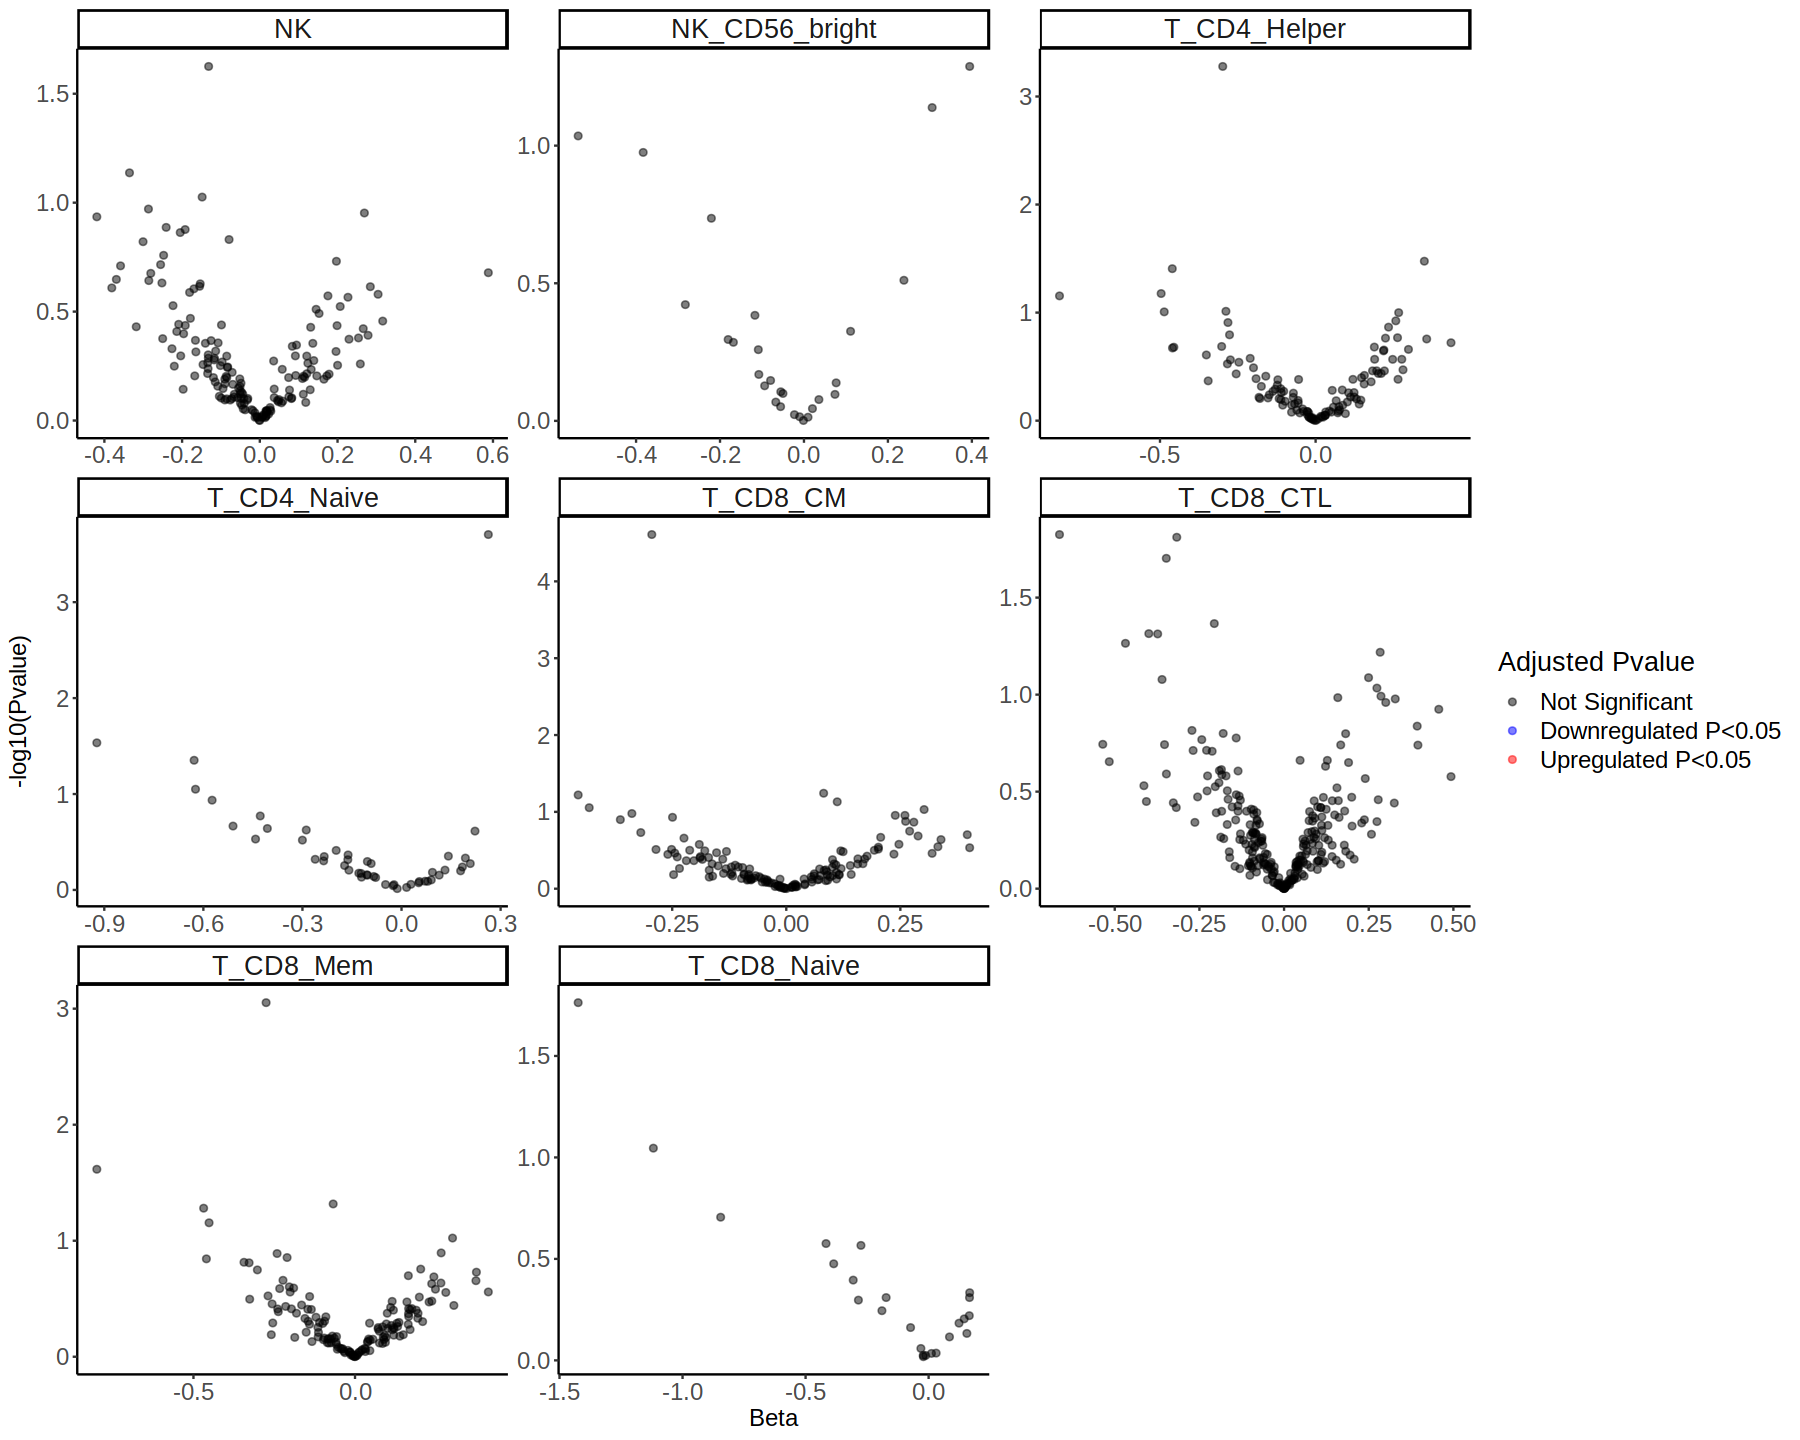

In [61]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df4[df4$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df4[df4$level==2,],qval<0.05),aes(label=df4[df4$level==2 & df4$qval<0.05,"gene"]),size=5,colour="black")
  

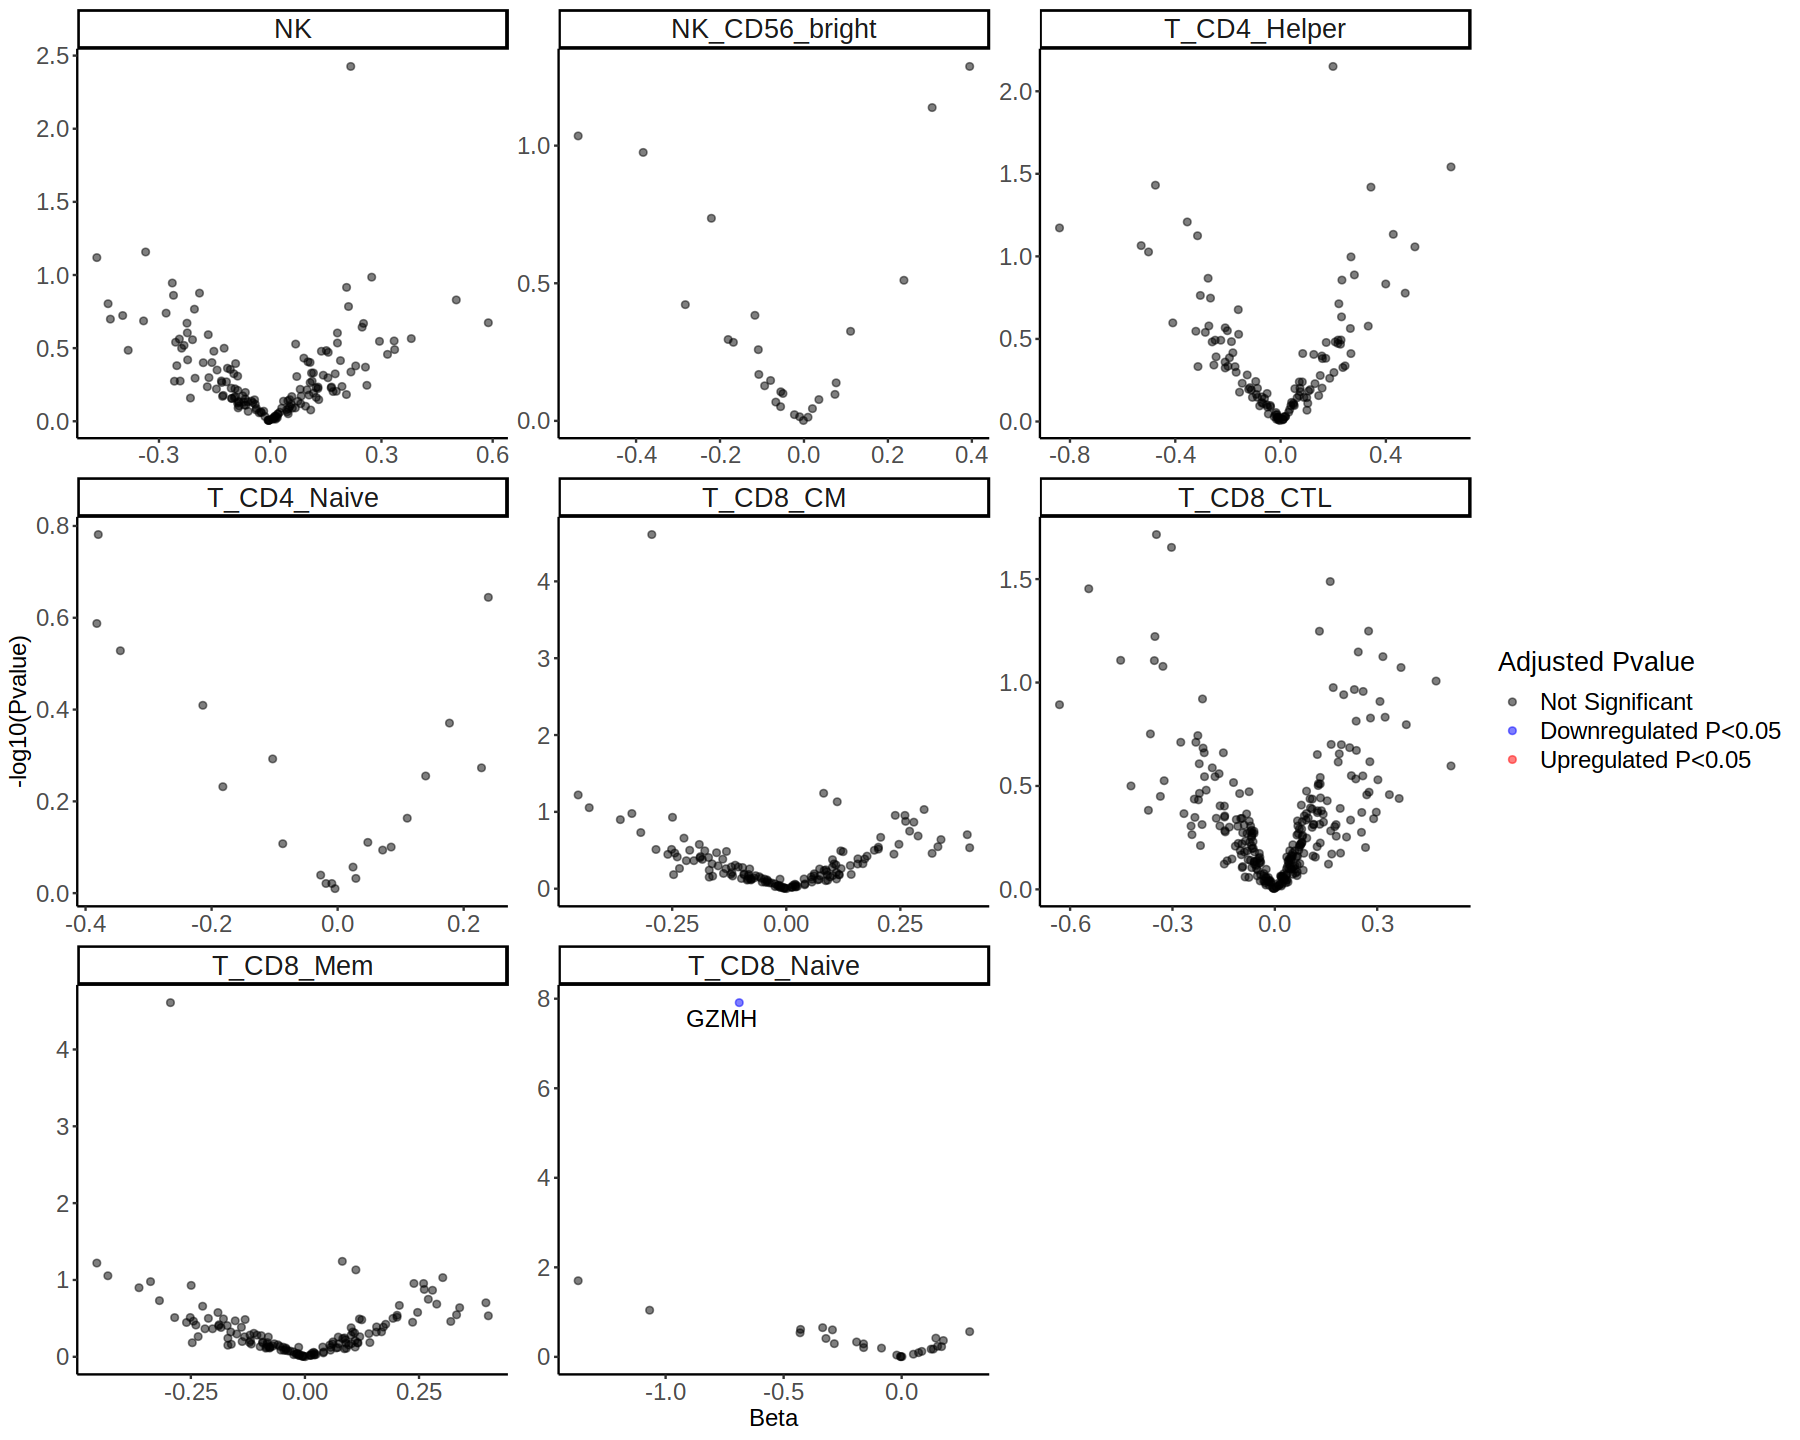

In [62]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df4[df4$level==3,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df4[df4$level==3,],qval<0.05),aes(label=df4[df4$level==3 & df4$qval<0.05,"gene"]),size=5,colour="black")
  

In [19]:
df5<-apply(new_input[new_input$V3==5,],1,function(x){
    #print(x[[1]])
    #print(x[[2]])
    #print(x[[3]])
    if(file.exists(paste0("./level_",x[[2]],"/comp_5/",x[[1]],"_all_deg_new_ethnicity_new.RData"))){
        load(paste0("./level_",x[[2]],"/comp_5/",x[[1]],"_all_deg_new_ethnicity_new.RData"))
        if(nrow(results5)>0){
            results5$gene<-rownames(results5)
            results5$level<-x[[2]]
            results5$comp<-5
            results5$cell_type<-x[[1]]
            return(results5)
        }
    }
    
})


In [20]:
#head(df5)

In [21]:
dftmp<-df5[-which(lapply(df5,is.null) == T)]

In [22]:
#head(dftmp)
df5<-dftmp

In [23]:
df5<-do.call(rbind,df5)
head(df5)
dim(df5)

beta     pval         qval         Singular Conv gene  level comp
261.DEFB1 3.456781 3.440708e-05 0.0016148078 0        0    DEFB1 1     5   
261.HESX1 2.975609 2.868014e-06 0.0002554003 0        0    HESX1 1     5   
261.OTOF  2.857620 1.058021e-04 0.0034556503 0        0    OTOF  1     5   
261.MFGE8 2.702867 9.968105e-04 0.0164908175 0        0    MFGE8 1     5   
261.MT1M  2.445488 2.272856e-04 0.0058184004 0        0    MT1M  1     5   
261.TPST1 2.432332 1.407072e-03 0.0207972446 0        0    TPST1 1     5   
          cell_type
261.DEFB1 monocyte 
261.HESX1 monocyte 
261.OTOF  monocyte 
261.MFGE8 monocyte 
261.MT1M  monocyte 
261.TPST1 monocyte

[1] 12847     9

In [24]:
df5<- df5 %>%
        mutate(colour=case_when(qval>=0.05 ~ "Not Significant",
                                qval<0.05 & beta>0 ~ "Upregulated P<0.05",
                                qval<0.05 & beta<0 ~ "Downregulated P<0.05"))


In [25]:
#need to write out to file
sig<-df5[df5$qval<0.05,]

In [26]:
sig<-sig[order(sig$qval),]


In [27]:
head(sig)

beta      pval          qval          Singular Conv gene   level
300.ISG15   2.250639  0.000000e+00  0.000000e+00 0        0    ISG15  2    
300.IFI44L  2.526045 1.267339e-259 1.854751e-256 0        0    IFI44L 2    
261.C1QB    1.300756 2.372257e-237 4.119423e-234 0        0    C1QB   1    
277.MNDA    3.151247 8.335530e-235 3.564273e-231 0        0    MNDA   2    
311.MNDA    3.151247 8.335530e-235 3.564273e-231 0        0    MNDA   4    
274.IL1B   -1.083811 2.824262e-159 2.287417e-156 0        0    IL1B   2    
           comp cell_type colour              
300.ISG15  5    DC3       Upregulated P<0.05  
300.IFI44L 5    DC3       Upregulated P<0.05  
261.C1QB   5    monocyte  Upregulated P<0.05  
277.MNDA   5    pDC       Upregulated P<0.05  
311.MNDA   5    pDC       Upregulated P<0.05  
274.IL1B   5    CD14mono  Downregulated P<0.05

In [28]:
write.table(sig,"sig_DEG_comp_5_results.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

In [29]:
write.table(df5,"sig_DEG_comp_5_results_all.tsv",col.names=TRUE,row.names=FALSE,quote=FALSE,sep="\t")

Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


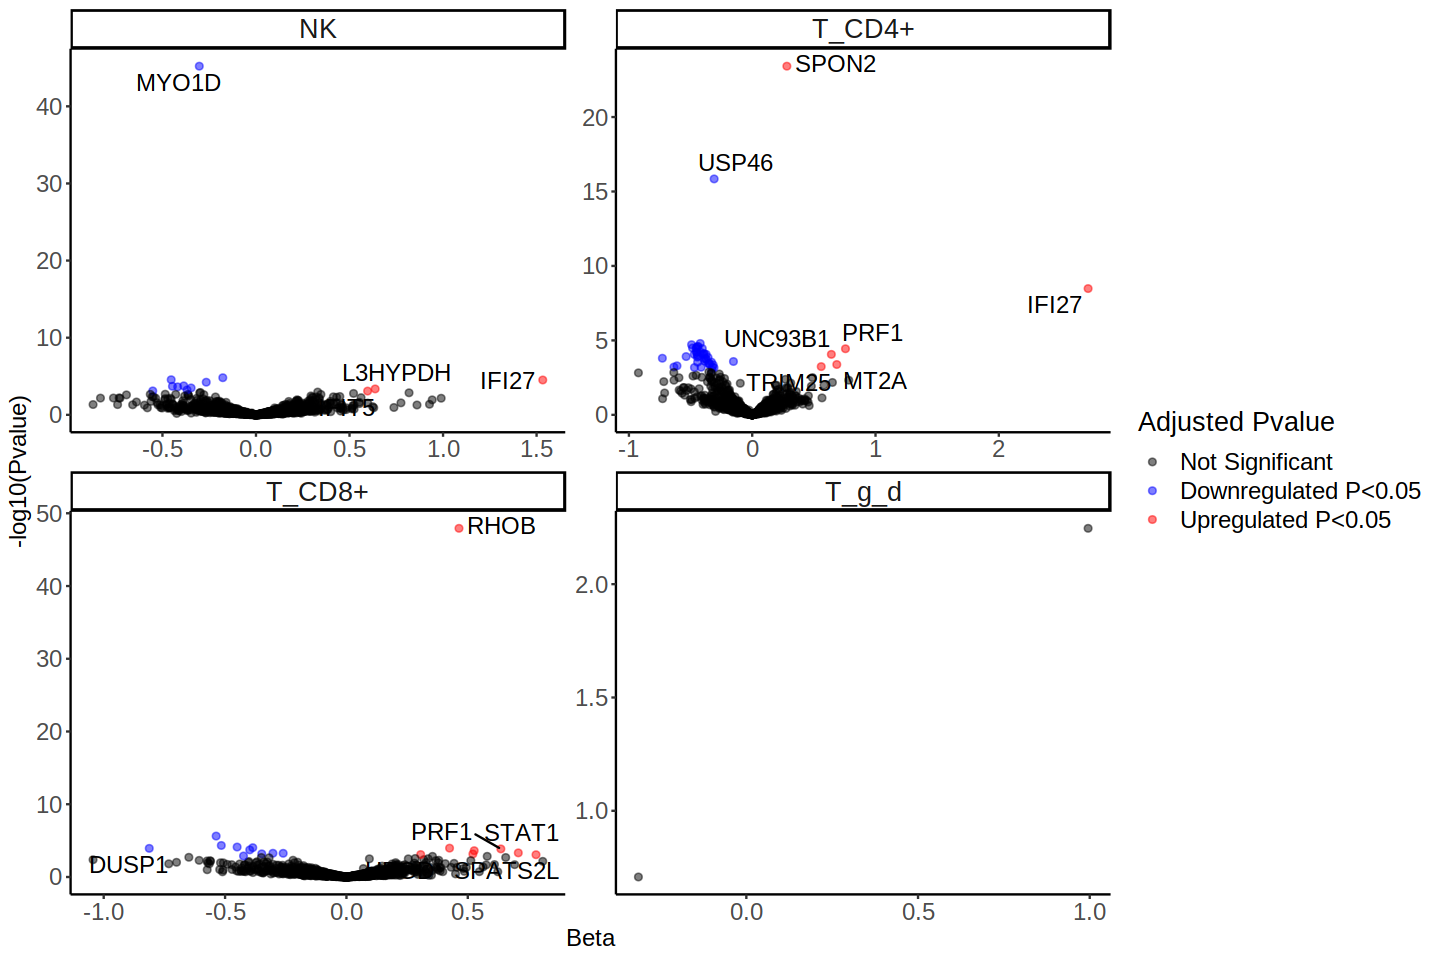

In [73]:
cols<-c("Not Significant"="black","Downregulated P<0.05"="blue","Upregulated P<0.05"="red")

options(repr.plot.width = 12,repr.plot.height = 8)
ggplot(df5[df5$level==1,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
         strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df5[df5$level==1,],qval<0.05),aes(label=df5[df5$level==1 & df5$qval<0.05,"gene"]),size=5,colour="black")
  
       
      

Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


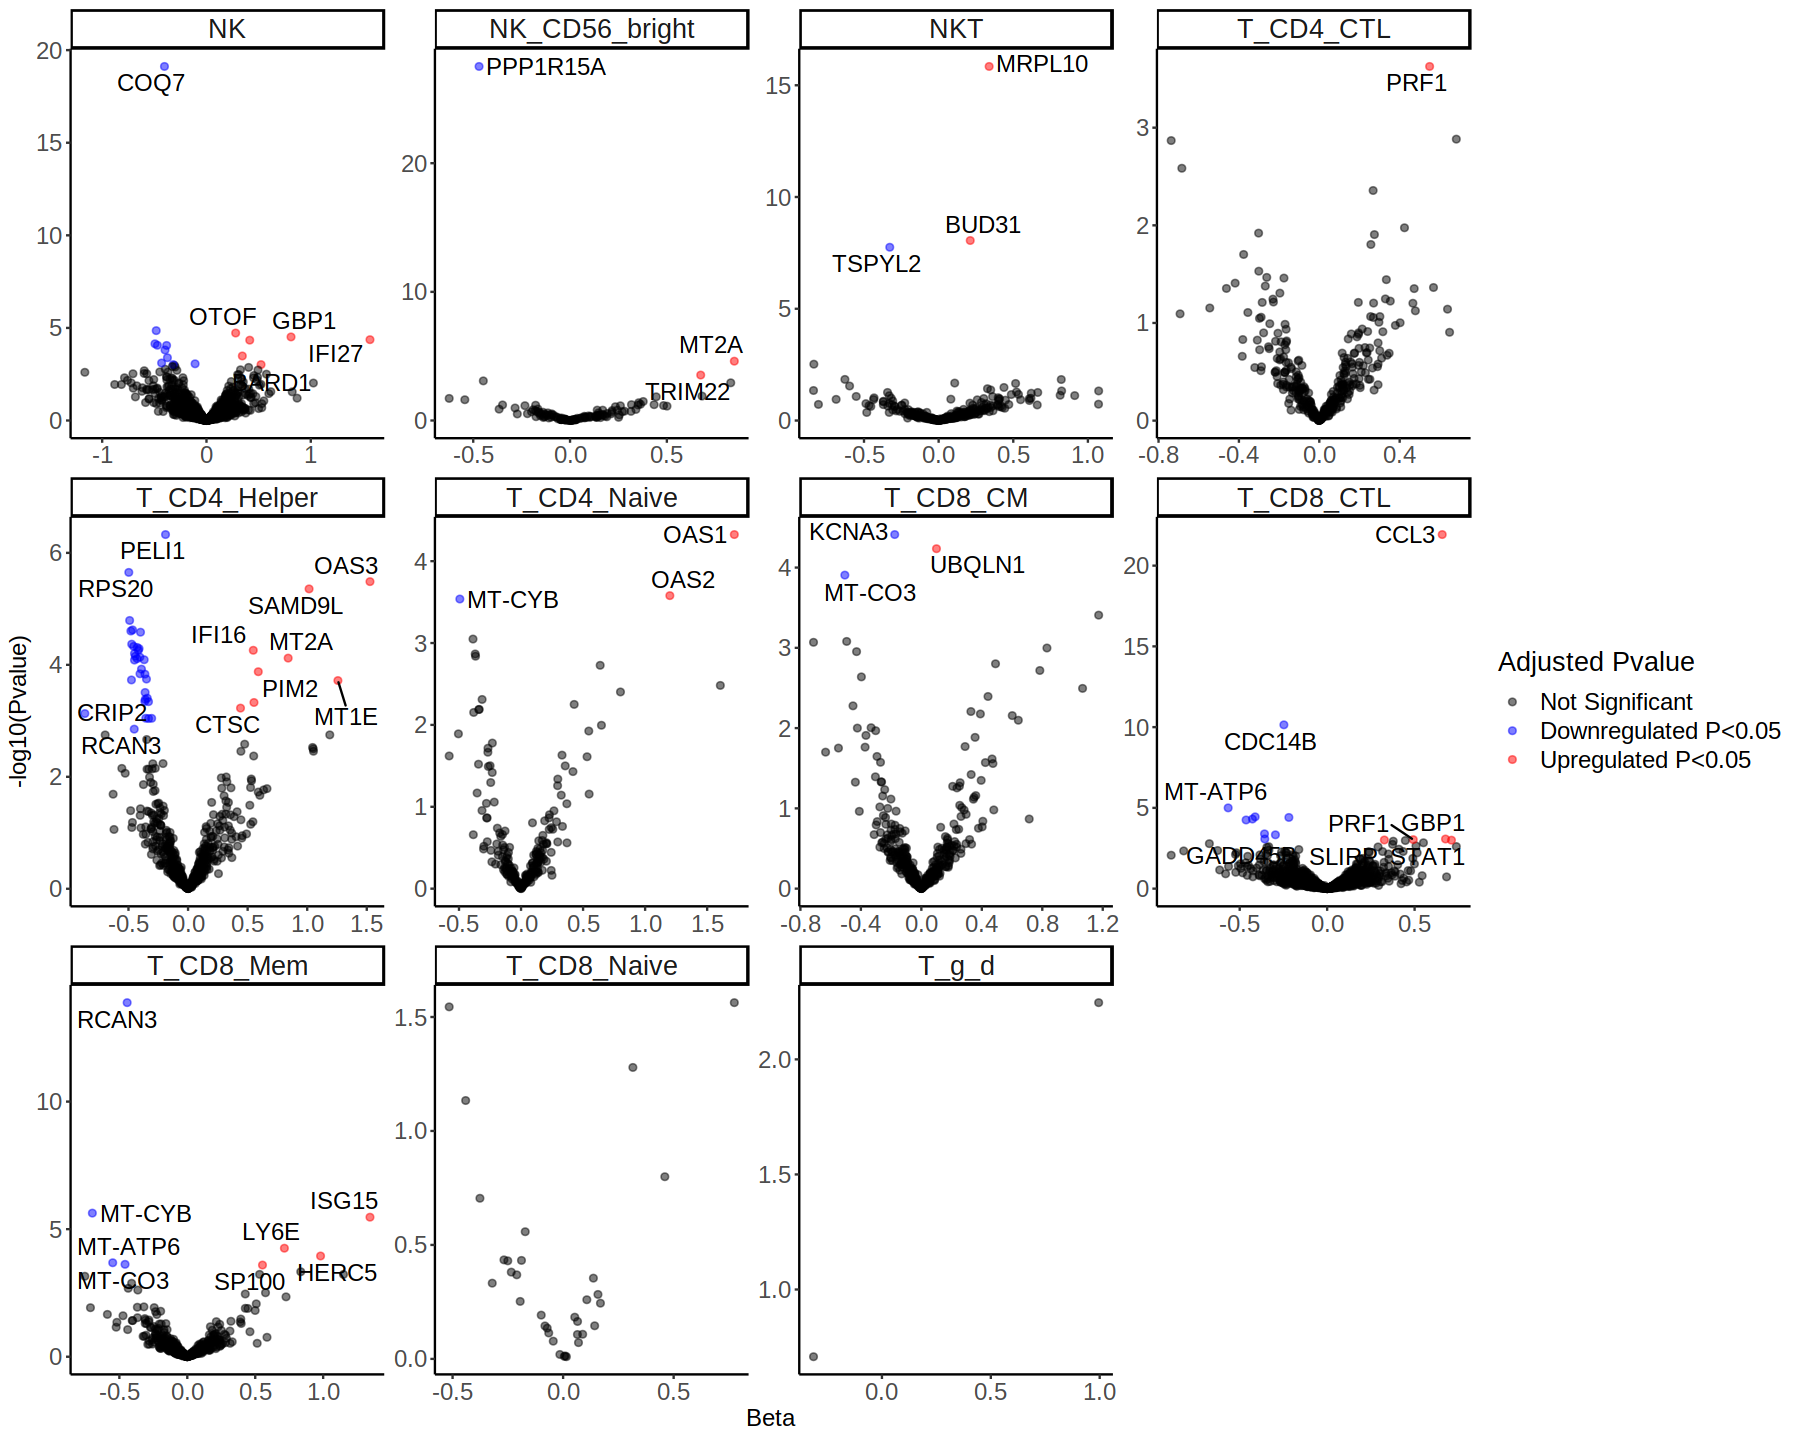

In [74]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df5[df5$level==2,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df5[df5$level==2,],qval<0.05),aes(label=df5[df5$level==2 & df5$qval<0.05,"gene"]),size=5,colour="black")
  

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 56 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


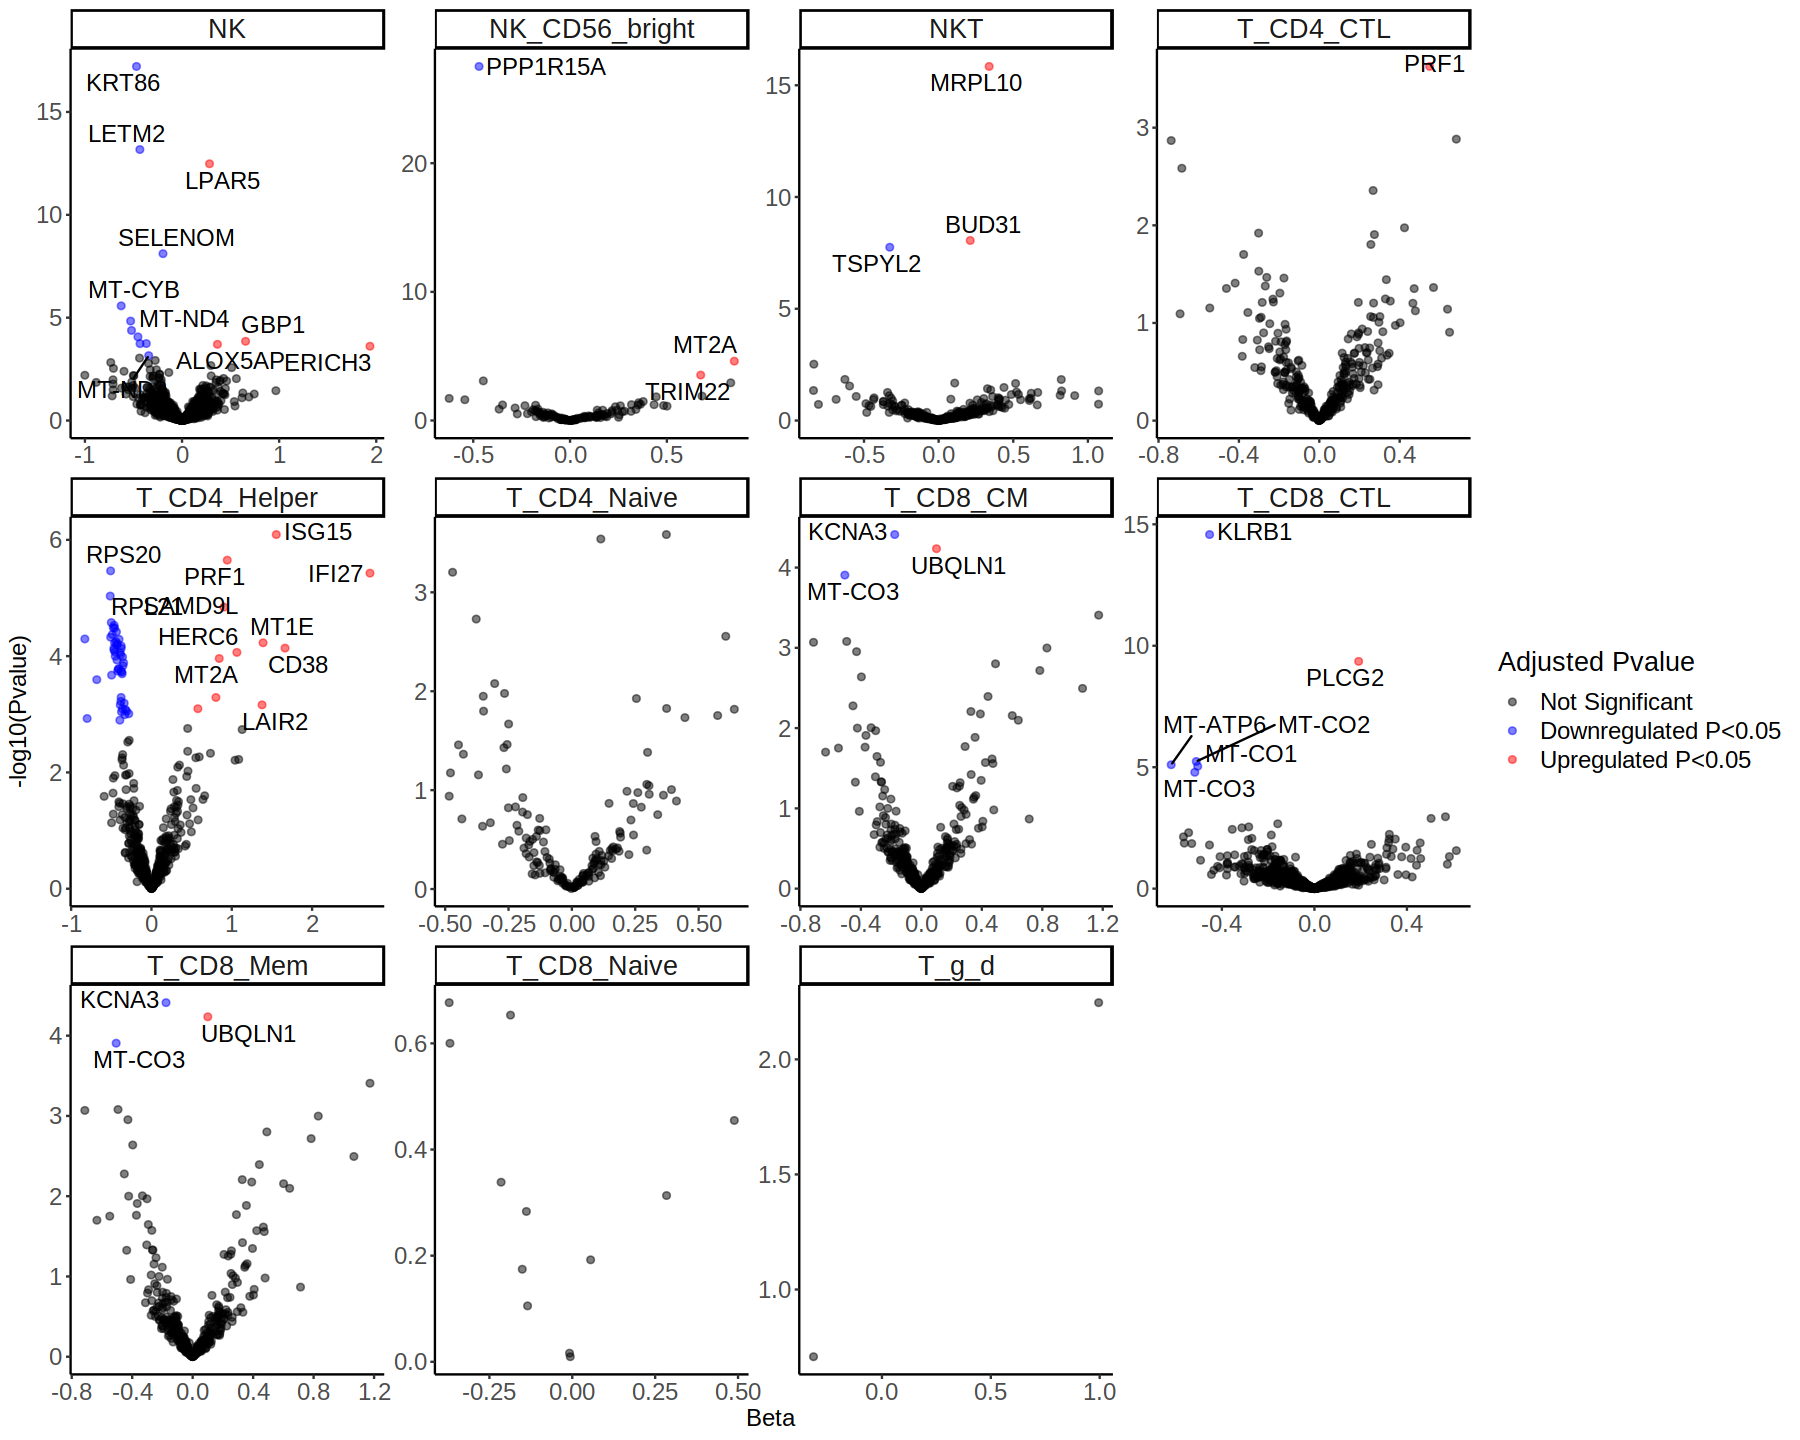

In [75]:
 
options(repr.plot.width = 15,repr.plot.height =12)
ggplot(df5[df5$level==3,],aes(x=beta, y=-log10(pval), colour=factor(colour,levels=c("Not Significant","Downregulated P<0.05","Upregulated P<0.05"))))+
    geom_point(alpha=0.5) +
    scale_colour_manual(values = cols) +
    facet_wrap(~cell_type,scales="free")+
    ylab("-log10(Pvalue)") +
    xlab("Beta") +
    labs(colour = "Adjusted Pvalue") +
    #ggtitle(plot_title) +
    theme_classic()+
    theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14),
        plot.title=element_text(size=16),
        legend.text=element_text(size=14),
        legend.title=element_text(size=16),
        strip.text = element_text(size = 16))+
    geom_text_repel(data=subset(df5[df5$level==3,],qval<0.05),aes(label=df5[df5$level==3 & df5$qval<0.05,"gene"]),size=5,colour="black")
  